In [1905]:
# %pip install pandas
# %pip install numpy
# %pip install plotly
# %pip install seaborn
# %pip install matplotlib
# %pip install nbformat

In [1906]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import nbformat

In [1907]:
pd.options.display.float_format = '{:,.2f}'.format

## Read the data

In [1908]:
df_data = pd.read_csv('rents_clean.csv/rents_clean.csv')

In [1909]:
df_data.shape

(126237, 33)

In [1910]:
df_data.columns

Index(['regione', 'citta', 'quartiere', 'prezzo', 'datetime', 'posti auto',
       'bagni per stanza', 'bagni', 'stanze', 'ultimo piano', 'stato',
       'classe energetica', 'vista mare', 'riscaldamento centralizzato',
       'superficie', 'arredato', 'balcone', 'impianto tv',
       'esposizione esterna', 'fibra ottica', 'cancello elettrico', 'cantina',
       'giardino comune', 'giardino privato', 'impianto allarme', 'portiere',
       'piscina', 'villa', 'intera proprieta', 'appartamento', 'attico',
       'loft', 'mansarda'],
      dtype='object')

In [1911]:
df_data.columns = ['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
                   'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
                   'energy class', 'sea view', 'central heating', 'area', 'furnished',
                   'balcony', 'TV system', 'external exposure', 'fiber optic', 'electric gate',
                   'cellar', 'shared garden', 'private garden', 'alarm system', 'doorman',
                   'pool', 'villa', 'entire property', 'apartment', 'penthouse', 'loft', 'attic']

## Remove Duplicates and NaN values

In [1912]:
df_data.duplicated().values.any()

np.True_

In [1913]:
df_data[df_data.duplicated(keep=False)].sort_values('city')


region             city              neighborhood  price  \
47959   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
47919   lombardia    Abbiategrasso  Via Francesco De Sanctis 900.00   
73887     sicilia        Agrigento             Via Empedocle 400.00   
7799      sicilia        Agrigento                ViaMinerva 750.00   
72427     sicilia        Agrigento             Via Empedocle 400.00   
...           ...              ...                       ...    ...   
67710    piemonte           Vinovo                 Via Nessa 695.00   
12724      veneto  Vittorio Veneto           Via del Maniero 650.00   
12850      veneto  Vittorio Veneto           Via del Maniero 650.00   
121876      lazio         Zagarolo            Via del Cinema 550.00   
121490      lazio         Zagarolo            Via del Cinema 550.00   

          datetime  parking spots  bathrooms per room  bathrooms  rooms  \
47959   2023-05-19              0                0.50       1.00   2.00   
47919   2023-05-19              0                0.50       1.00   2.00   
73887   2023-08-06              0                0.50       1.00   2.00   
7799    2023-03-21              1                0.50       2.00   4.00   
72427   2023-08-06              0                0.50       1.00   2.00   
...            ...            ...                 ...        ...    ...   
67710   2023-05-06              0                0.50       2.00   4.00   
12724   2023-03-04              1                0.50       1.00   2.00   
12850   2023-03-04              1                0.50       1.00   2.00   
121876  2023-07-24              0                1.00       1.00   1.00   
121490  2023-07-24              0                1.00       1.00   1.00   

        top floor  ... private garden alarm system  doorman  pool  villa  \
47959           0  ...              0            0        0     0      0   
47919           0  ...              0            0        0     0      0   
73887           0  ...              0            0        0     0      0   
7799            0  ...              0            0        0     0      0   
72427           0  ...              0            0        0     0      0   
...           ...  ...            ...          ...      ...   ...    ...   
67710           0  ...              1            0        0     0      0   
12724           0  ...              0            0        0     0      0   
12850           0  ...              0            0        0     0      0   
121876          0  ...              0            0        0     0      0   
121490          0  ...              0            0        0     0      0   

        entire property  apartment  penthouse  loft  attic  
47959                 0          1          0     0      0  
47919                 0          1          0     0      0  
73887                 0          1          0     0      0  
7799                  0          1          0     0      0  
72427                 0          1          0     0      0  
...                 ...        ...        ...   ...    ...  
67710                 0          1          0     0      0  
12724                 0          1          0     0      0  
12850                 0          1          0     0      0  
121876                0          1          0     0      0  
121490                0          1          0     0      0  

[2869 rows x 33 columns]

In [1914]:
df_data = df_data.drop_duplicates()

In [1915]:
df_data.isna().sum()

region                   12
city                     15
neighborhood           7410
price                  5688
datetime                  0
parking spots             0
bathrooms per room    10669
bathrooms              4052
rooms                  8503
top floor                 0
condition              8276
energy class          24148
sea view                112
central heating       18373
area                   9731
furnished                 0
balcony                   0
TV system                 0
external exposure         0
fiber optic               0
electric gate             0
cellar                    0
shared garden             0
private garden            0
alarm system              0
doorman                   0
pool                      0
villa                     0
entire property           0
apartment                 0
penthouse                 0
loft                      0
attic                     0
dtype: int64

In [1916]:
df_data[df_data.isna().any(axis=1)]

region              city  \
0                         NaN            Milano   
1                         NaN            Torino   
2                         NaN            Padova   
3                         NaN           Firenze   
4                         NaN  Monte Argentario   
...                       ...               ...   
126204                sicilia           Palermo   
126206         emilia-Romagna           Bologna   
126210               calabria         Catanzaro   
126218  friuli-venezia-giulia           Trieste   
126233  friuli-venezia-giulia           Trieste   

                              neighborhood    price    datetime  \
0                                 Centrale 1,800.00  2023-07-03   
1                               Santa Rita   450.00  2023-07-03   
2           Prato della Valle - Pontecorvo 3,200.00  2023-07-03   
3                                 Galluzzo 1,700.00  2022-12-21   
4                  Località Poggio Pertuso 4,000.00  2023-06-03   
...                                    ...      ...         ...   
126204          Giotto Galilei - Palagonia 1,200.00  2023-07-27   
126206                               Barca 1,300.00  2023-07-27   
126210               Mater Domini - Cavita   450.00  2023-07-26   
126218                     Borgo Teresiano   850.00  2023-07-26   
126233  Largo Barriera - Ospedale Maggiore   620.00  2023-07-25   

        parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
0                   1                0.33       1.00   3.00          0  ...   
1                   0                0.50       1.00   2.00          1  ...   
2                   1                 NaN       3.00    NaN          0  ...   
3                   0                 NaN       3.00    NaN          1  ...   
4                   1                0.60       3.00   5.00          0  ...   
...               ...                 ...        ...    ...        ...  ...   
126204              0                 NaN       2.00    NaN          1  ...   
126206              0                0.67       2.00   3.00          0  ...   
126210              0                0.67       2.00   3.00          0  ...   
126218              0                2.00       4.00   2.00          0  ...   
126233              0                0.33       1.00   3.00          0  ...   

       private garden alarm system  doorman  pool  villa  entire property  \
0                   0            0        0     0      0                0   
1                   0            0        0     0      0                0   
2                   0            0        0     0      0                0   
3                   1            0        0     0      1                0   
4                   1            0        0     0      1                0   
...               ...          ...      ...   ...    ...              ...   
126204              0            0        0     0      0                0   
126206              0            0        0     0      0                0   
126210              0            0        0     0      0                0   
126218              0            0        0     0      0                0   
126233              0            0        0     0      0                0   

        apartment  penthouse  loft  attic  
0               1          0     0      0  
1               1          0     0      0  
2               1          0     0      0  
3               0          0     0      0  
4               0          0     0      0  
...           ...        ...   ...    ...  
126204          1          0     0      0  
126206          1          0     0      0  
126210          1          0     0      0  
126218          1          0     0      0  
126233          1          0     0      0  

[54369 rows x 33 columns]

In [1917]:
df_data = df_data.dropna()

In [1918]:
df_data.isna().sum()

region                0
city                  0
neighborhood          0
price                 0
datetime              0
parking spots         0
bathrooms per room    0
bathrooms             0
rooms                 0
top floor             0
condition             0
energy class          0
sea view              0
central heating       0
area                  0
furnished             0
balcony               0
TV system             0
external exposure     0
fiber optic           0
electric gate         0
cellar                0
shared garden         0
private garden        0
alarm system          0
doorman               0
pool                  0
villa                 0
entire property       0
apartment             0
penthouse             0
loft                  0
attic                 0
dtype: int64

In [1919]:
df_data.shape

(70092, 33)

In [1920]:
df_data.datetime = pd.to_datetime(df_data.datetime)
df_data.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                    float64
rooms                        float64
top floor                      int64
condition                     object
energy class                  object
sea view                     float64
central heating              float64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [1921]:
df_data.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  \
12              0                0.50       1.00   2.00          1  ...   
13              0                1.00       1.00   1.00          0  ...   
15              1                0.50       1.00   2.00          0  ...   
16              0                0.33       1.00   3.00          0  ...   
19              0                0.33       1.00   3.00          0  ...   

   private garden alarm system  doorman  pool  villa  entire property  \
12              1            0        0     0      0                0   
13              0            0        0     0      0                0   
15              0            0        0     0      0                0   
16              0            0        0     0      0                0   
19              0            0        0     0      0                0   

    apartment  penthouse  loft  attic  
12          1          0     0      0  
13          1          0     0      0  
15          1          0     0      0  
16          1          0     0      0  
19          1          0     0      0  

[5 rows x 33 columns]

In [1922]:
# Find value counts for each column
for col in df_data.columns:
    print(f'{col}: {df_data[col].nunique()}')

region: 32
city: 3111
neighborhood: 11798
price: 911
datetime: 659
parking spots: 2
bathrooms per room: 26
bathrooms: 8
rooms: 5
top floor: 2
condition: 4
energy class: 8
sea view: 2
central heating: 2
area: 274
furnished: 2
balcony: 2
TV system: 1
external exposure: 2
fiber optic: 2
electric gate: 2
cellar: 2
shared garden: 2
private garden: 2
alarm system: 1
doorman: 1
pool: 2
villa: 2
entire property: 1
apartment: 2
penthouse: 2
loft: 2
attic: 2


### Percentage of flats by each city

In [1923]:
cities = df_data.city.value_counts()
fig = px.pie(labels=cities.index,
             values=cities.values,
             title="Percentage of of flats by each city",
             names=cities.index,
             hole=0.2,)

fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
fig.update_layout(width=1300, height=800)

fig.show(renderer='vscode')

### Average Distribution of Rent

In [1924]:
df_data['price'].describe()

count      70,092.00
mean        1,234.70
std         8,251.34
min             1.00
25%           550.00
50%           760.00
75%         1,250.00
max     1,150,000.00
Name: price, dtype: float64

In [1925]:
df_filtered_outliers = df_data[(df_data['price'] < 10000) & (df_data['price'] > 0)]

In [1926]:
# df_filtered_outliers = df_data

In [1927]:
# Change all float columns to int
df_filtered_outliers = df_filtered_outliers.astype({'bathrooms': 'int', 'rooms': 'int', 'parking spots': 'int', 'top floor': 'int', 'sea view': 'int', 'central heating': 'int',
                                                    'furnished': 'int', 'balcony': 'int', 'external exposure': 'int', 'fiber optic': 'int',
                                                    'electric gate': 'int', 'cellar': 'int', 'shared garden': 'int', 'private garden': 'int',
                                                    'pool': 'int', 'villa': 'int', 'apartment': 'int', 'penthouse': 'int', 'loft': 'int', 'attic': 'int'})

In [1928]:
# Check data types of columns
df_filtered_outliers.dtypes

region                        object
city                          object
neighborhood                  object
price                        float64
datetime              datetime64[ns]
parking spots                  int64
bathrooms per room           float64
bathrooms                      int64
rooms                          int64
top floor                      int64
condition                     object
energy class                  object
sea view                       int64
central heating                int64
area                         float64
furnished                      int64
balcony                        int64
TV system                      int64
external exposure              int64
fiber optic                    int64
electric gate                  int64
cellar                         int64
shared garden                  int64
private garden                 int64
alarm system                   int64
doorman                        int64
pool                           int64
v

In [1929]:
df_filtered_outliers.shape

(69888, 33)

In [1930]:
# Find each unique value count for 'TV system', 'alarm system', 'doorman', 'entire property'

for col in ['TV system', 'alarm system', 'doorman', 'entire property']:
    print(f'{col}: {df_filtered_outliers[col].value_counts()}')

TV system: TV system
0    69888
Name: count, dtype: int64
alarm system: alarm system
0    69888
Name: count, dtype: int64
doorman: doorman
0    69888
Name: count, dtype: int64
entire property: entire property
0    69888
Name: count, dtype: int64


In [1931]:
# Drop Columns with only one value
df_filtered_outliers.drop(['TV system', 'alarm system', 'doorman', 'entire property'], axis=1, inplace=True)

In [1932]:
df_filtered_outliers.price

12       1,800.00
13         500.00
15         825.00
16         550.00
19         500.00
           ...   
126231     700.00
126232     500.00
126234     750.00
126235   1,200.00
126236     800.00
Name: price, Length: 69888, dtype: float64

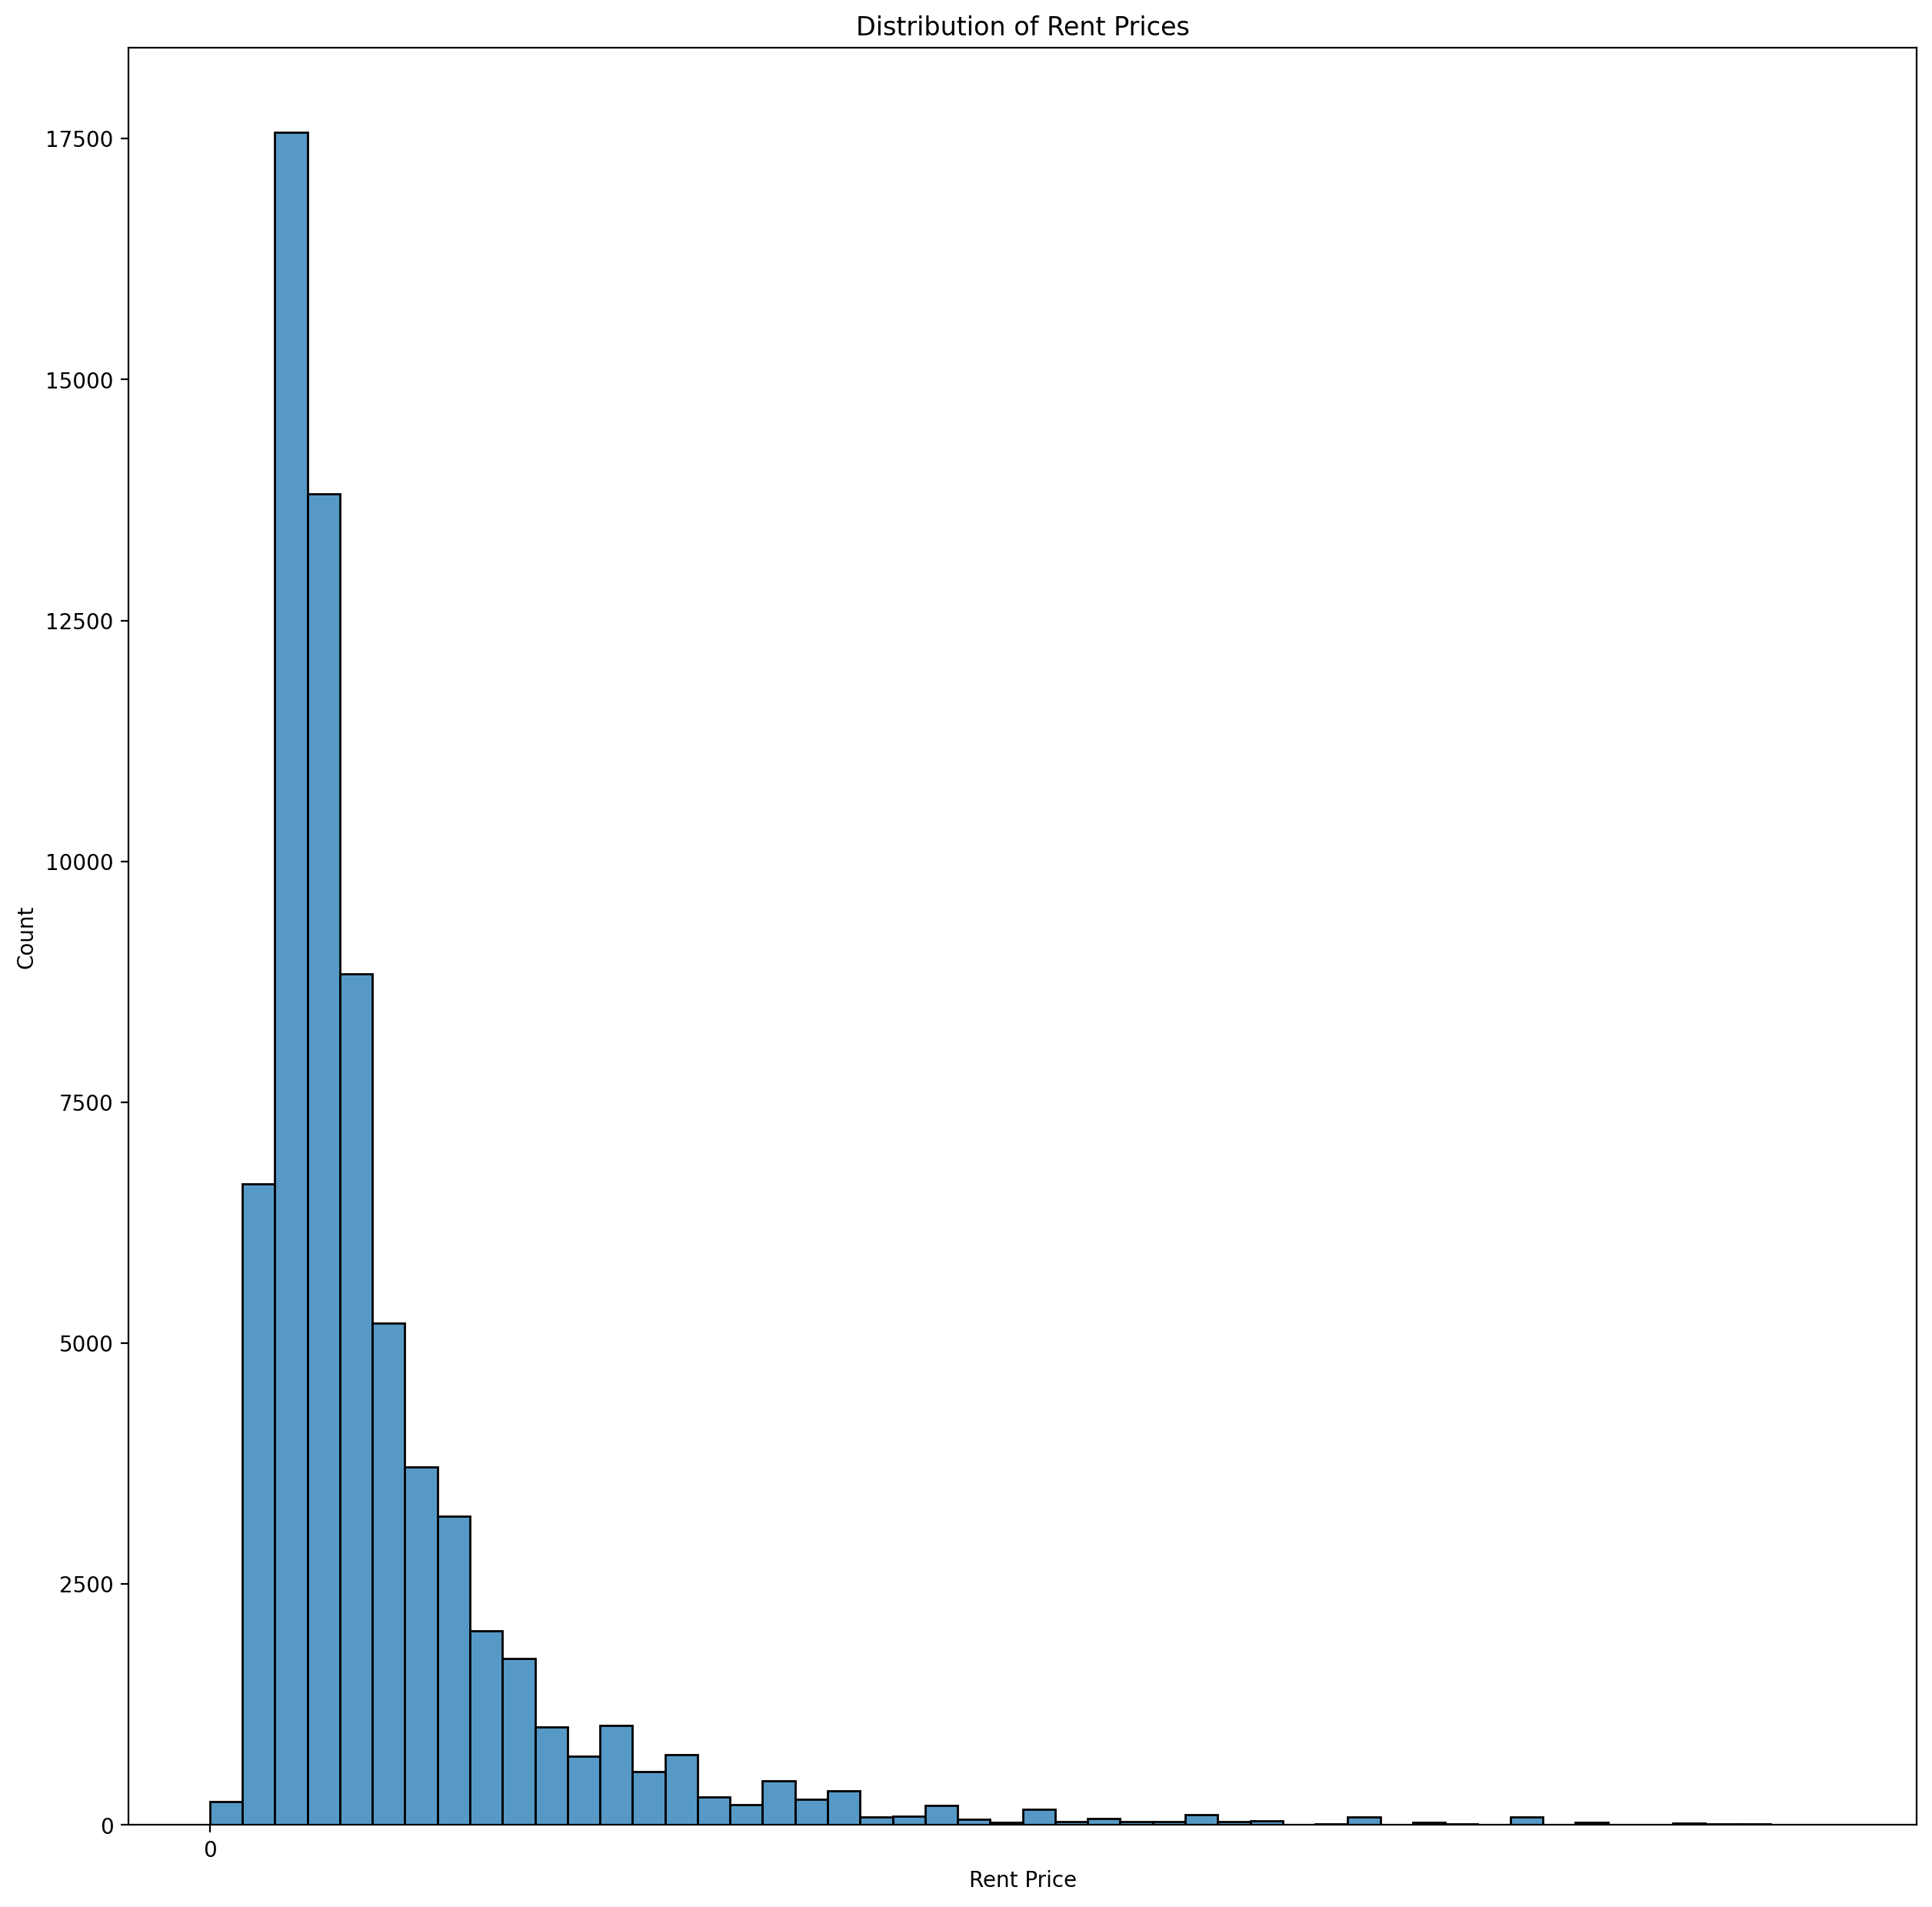

In [1933]:
plt.figure(figsize=(15, 15), dpi=200)
sns.histplot(data=df_filtered_outliers,
             x=df_filtered_outliers.price,
             bins=50)
plt.xlabel('Rent Price')
plt.xticks(range(0, 10000, 10000))
plt.title('Distribution of Rent Prices')
plt.show()

### Area vs Price

In [1934]:
df_filtered_outliers['area'].describe()

count   69,888.00
mean        73.09
std         34.78
min          1.00
25%         50.00
50%         65.00
75%         90.00
max        300.00
Name: area, dtype: float64

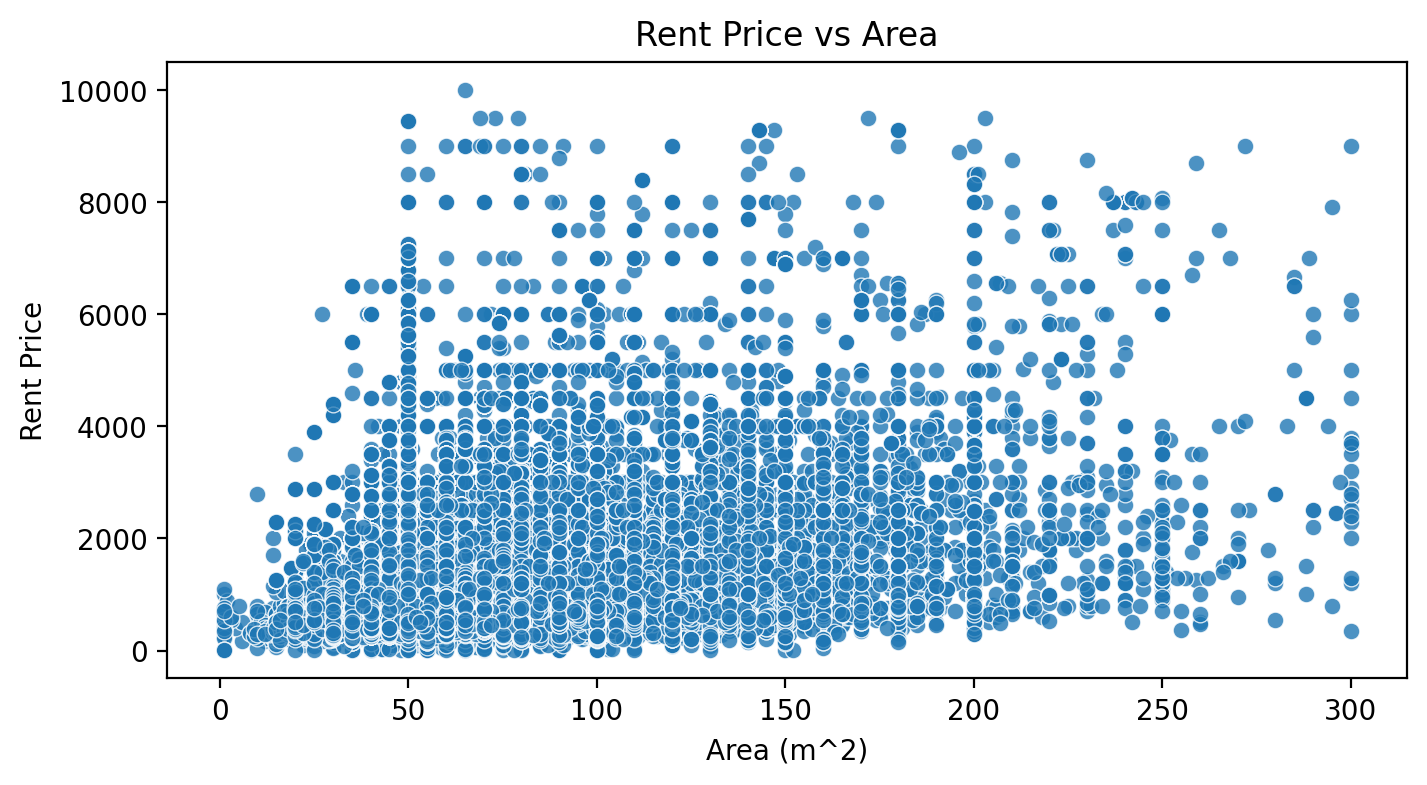

In [1935]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=df_filtered_outliers,
                x='area',
                y='price',
                alpha=0.8)

plt.xlabel('Area (m^2)')
plt.ylabel('Rent Price')
plt.title('Rent Price vs Area')
plt.show()

In [1936]:
df_data.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'TV system', 'external exposure', 'fiber optic',
       'electric gate', 'cellar', 'shared garden', 'private garden',
       'alarm system', 'doorman', 'pool', 'villa', 'entire property',
       'apartment', 'penthouse', 'loft', 'attic'],
      dtype='object')

### Property Count by Type

In [1937]:
villa = df_filtered_outliers['villa'].sum()
apartment = df_filtered_outliers['apartment'].sum()
penthouse = df_filtered_outliers['penthouse'].sum()
loft = df_filtered_outliers['loft'].sum()
attic = df_filtered_outliers['attic'].sum()
villa

np.int64(1504)

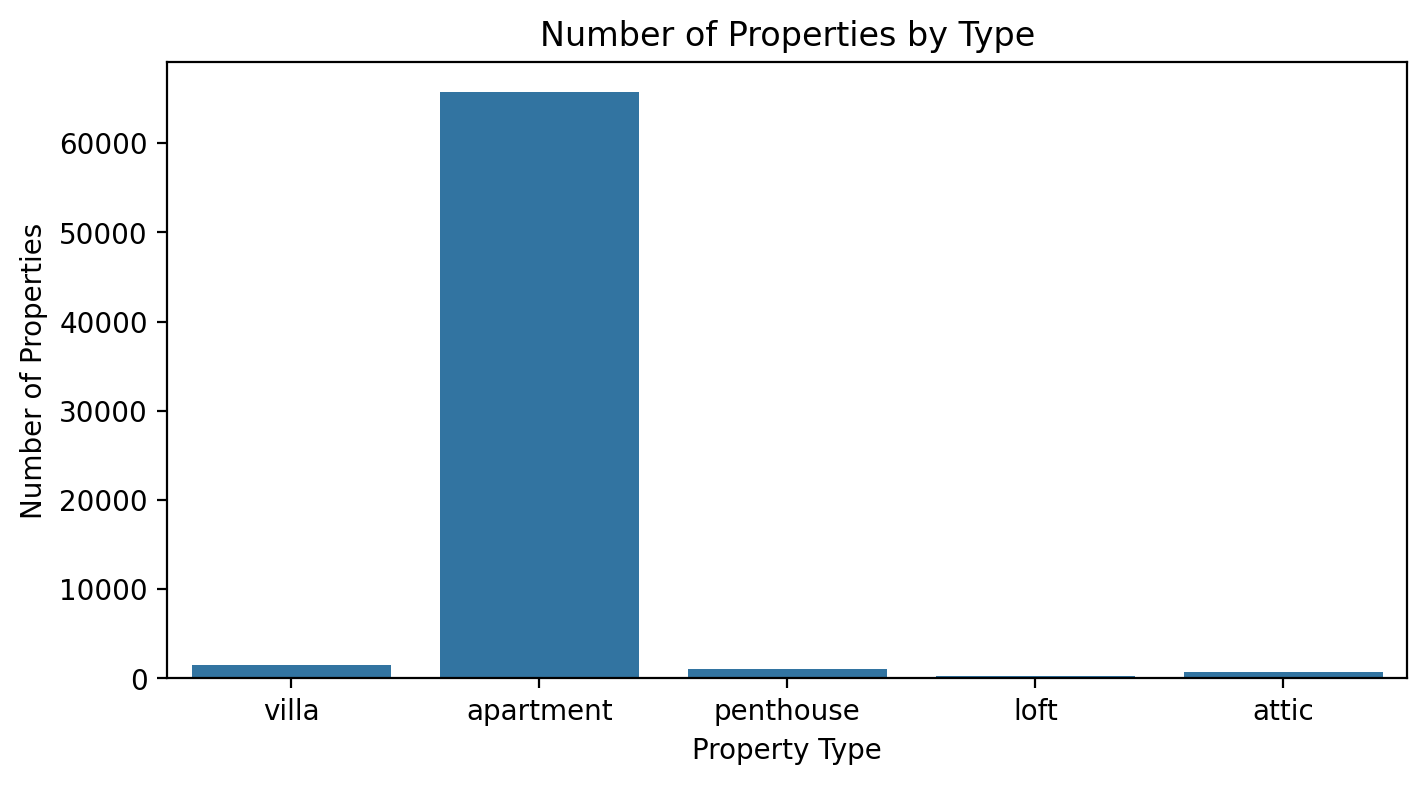

In [1938]:
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=['villa', 'apartment', 'penthouse', 'loft', 'attic'],
            y=[villa, apartment, penthouse, loft, attic])
plt.xlabel('Property Type')
plt.ylabel('Number of Properties')
plt.title('Number of Properties by Type')
plt.show()

### Average Rent by Property Type

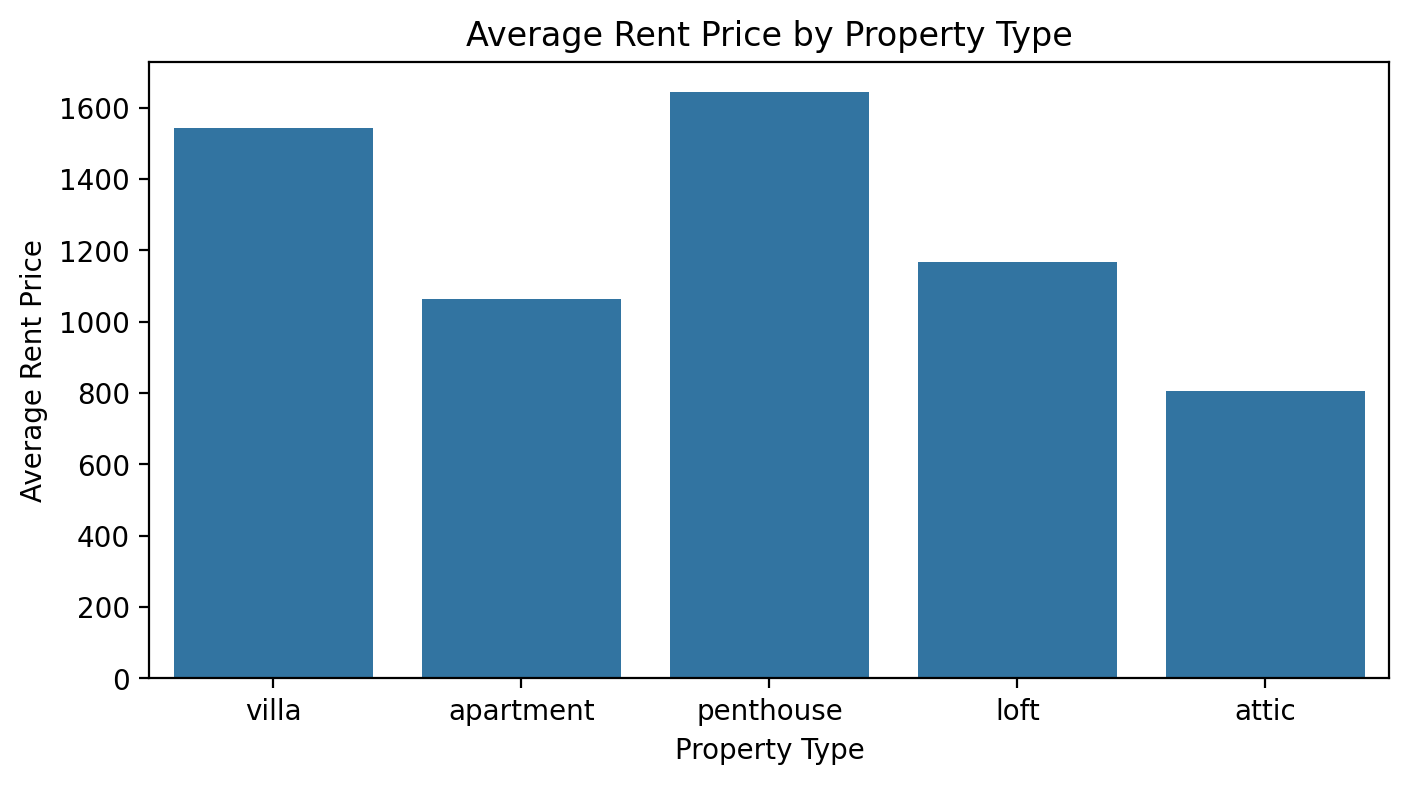

In [1939]:
average_prices = {
    'villa': df_filtered_outliers[df_filtered_outliers['villa'] == 1]['price'].mean(),
    'apartment': df_filtered_outliers[df_filtered_outliers['apartment'] == 1]['price'].mean(),
    'penthouse': df_filtered_outliers[df_filtered_outliers['penthouse'] == 1]['price'].mean(),
    'loft': df_filtered_outliers[df_filtered_outliers['loft'] == 1]['price'].mean(),
    'attic': df_filtered_outliers[df_filtered_outliers['attic'] == 1]['price'].mean()
}

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=list(average_prices.keys()), y=list(average_prices.values()))
plt.xlabel('Property Type')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Property Type')
plt.show()

In [1940]:
# Find the percentage of each property type
total_properties = villa + apartment + penthouse + loft + attic
villa_percent = (villa / total_properties) * 100
apartment_percent = (apartment / total_properties) * 100
penthouse_percent = (penthouse / total_properties) * 100
loft_percent = (loft / total_properties) * 100
attic_percent = (attic / total_properties) * 100

villa_percent, apartment_percent, penthouse_percent, loft_percent, attic_percent, total_properties, villa, apartment, penthouse, loft, attic

(np.float64(2.1704934120329615),
 np.float64(94.90136088782417),
 np.float64(1.5167477234352678),
 np.float64(0.3434690372764926),
 np.float64(1.0679289394311113),
 np.int64(69293),
 np.int64(1504),
 np.int64(65760),
 np.int64(1051),
 np.int64(238),
 np.int64(740))

In [1941]:
# Drop every row of properties that are not apartments
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['apartment'] == 1]

In [1942]:
# Drop the property type columns
df_filtered_outliers.drop(['villa', 'penthouse', 'loft', 'attic', 'apartment'], axis=1, inplace=True)

In [1943]:
# Check the columns
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'sea view', 'central heating', 'area', 'furnished',
       'balcony', 'external exposure', 'fiber optic', 'electric gate',
       'cellar', 'shared garden', 'private garden', 'pool'],
      dtype='object')

In [1944]:
# Check the data head
df_filtered_outliers.head()

region       city                neighborhood    price   datetime  \
12       lombardia     Milano                       Isola 1,800.00 2023-07-03   
13        piemonte     Torino             Via della Rocca   500.00 2023-08-03   
15  emilia-romagna    Bologna       Saragozza fuori Porta   825.00 2023-08-03   
16         liguria     Genova                         Prè   550.00 2023-08-03   
19        calabria  Catanzaro  Sant'Antonio - De Filippis   500.00 2023-06-03   

    parking spots  bathrooms per room  bathrooms  rooms  top floor  ...  area  \
12              0                0.50          1      2          1  ... 63.00   
13              0                1.00          1      1          0  ... 35.00   
15              1                0.50          1      2          0  ... 44.00   
16              0                0.33          1      3          0  ... 60.00   
19              0                0.33          1      3          0  ... 90.00   

   furnished  balcony  external exposure  fiber optic  electric gate  cellar  \
12         1        0                  0            1              1       0   
13         1        0                  0            0              1       0   
15         1        0                  0            0              0       0   
16         1        0                  1            0              0       0   
19         1        1                  0            0              0       0   

    shared garden  private garden  pool  
12              0               1     0  
13              0               0     0  
15              0               0     0  
16              0               0     0  
19              0               0     0  

[5 rows x 24 columns]

In [1945]:
# Drop column: pool, sea view and private garden because of skewness
df_filtered_outliers.drop(['pool', 'sea view', 'private garden'], axis=1, inplace=True)

In [1946]:
# Find the number of count of each bathroom
df_filtered_outliers['bathrooms'].value_counts()

bathrooms
1    52764
2    11894
3      997
4       55
5       22
6       15
7        7
8        6
Name: count, dtype: int64

In [1947]:
# Remove bathroom greater than 2
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['bathrooms'] <= 2]

In [1948]:
average_prices_by_region = df_filtered_outliers.groupby('region')['price'].mean().sort_values()
average_prices_by_region

region
Liguria                   350.00
l-aquila                  400.00
umbria                    469.94
genova                    504.29
basilicata                518.94
palermo                   565.00
catanzaro                 595.94
piemonte                  604.83
molise                    610.21
calabria                  619.02
marche                    658.08
puglia                    676.75
torino                    700.00
bari                      700.00
sicilia                   733.38
napoli                    750.00
liguria                   766.51
abruzzo                   774.57
friuli-venezia-giulia     793.13
campania                  844.08
veneto                    900.57
trentino-alto-adige       958.25
emilia-romagna          1,013.32
lazio                   1,030.44
valle-d-aosta           1,033.28
trieste                 1,126.78
emilia-Romagna          1,160.08
toscana                 1,203.71
venezia                 1,225.00
milano                  1,250.00
sar

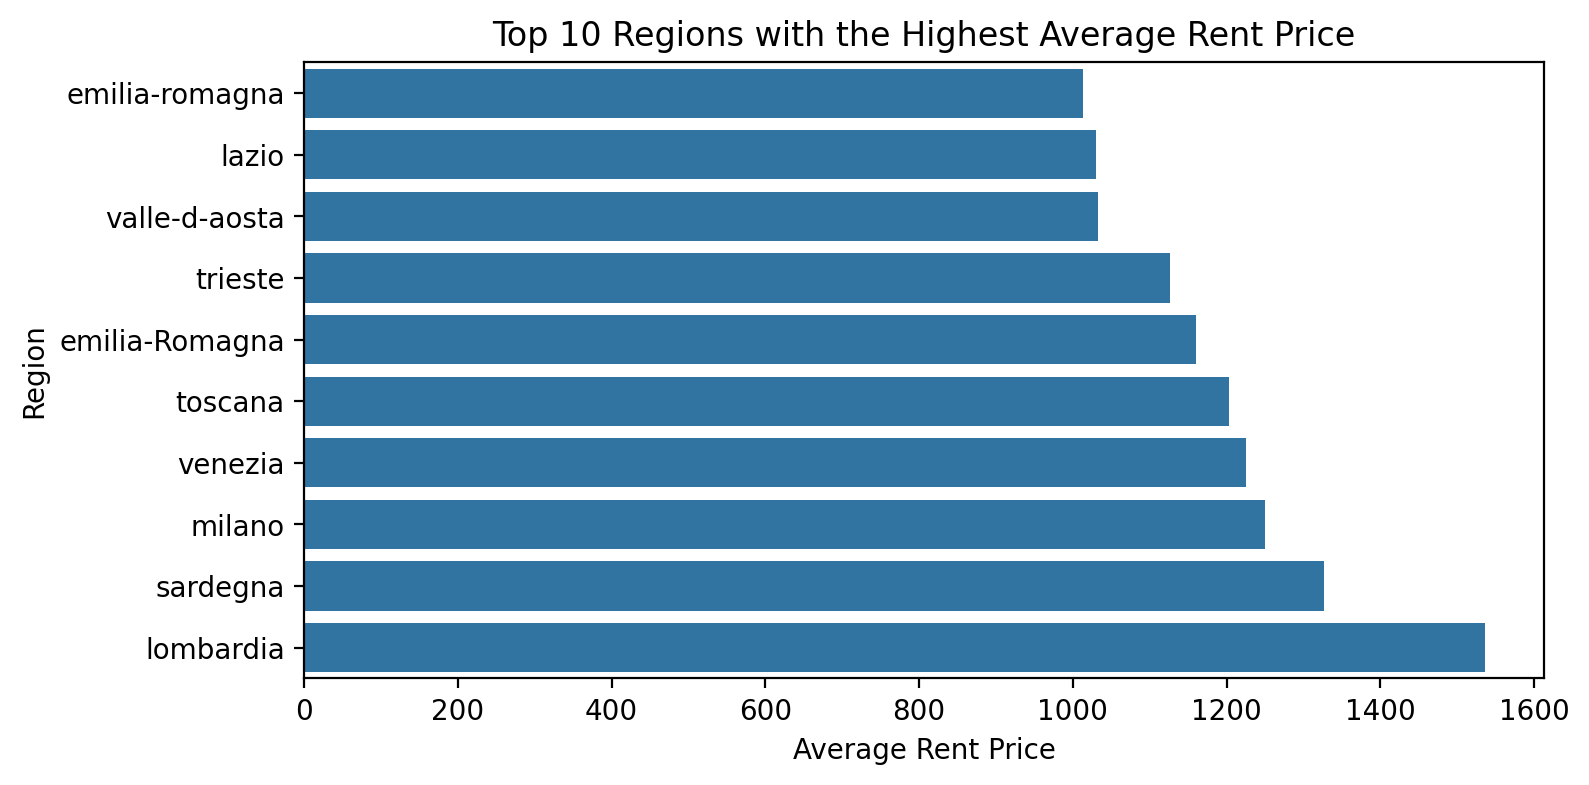

In [1949]:
top_10_regions_high = average_prices_by_region.tail(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_high.values, y=top_10_regions_high.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Highest Average Rent Price')
plt.show()


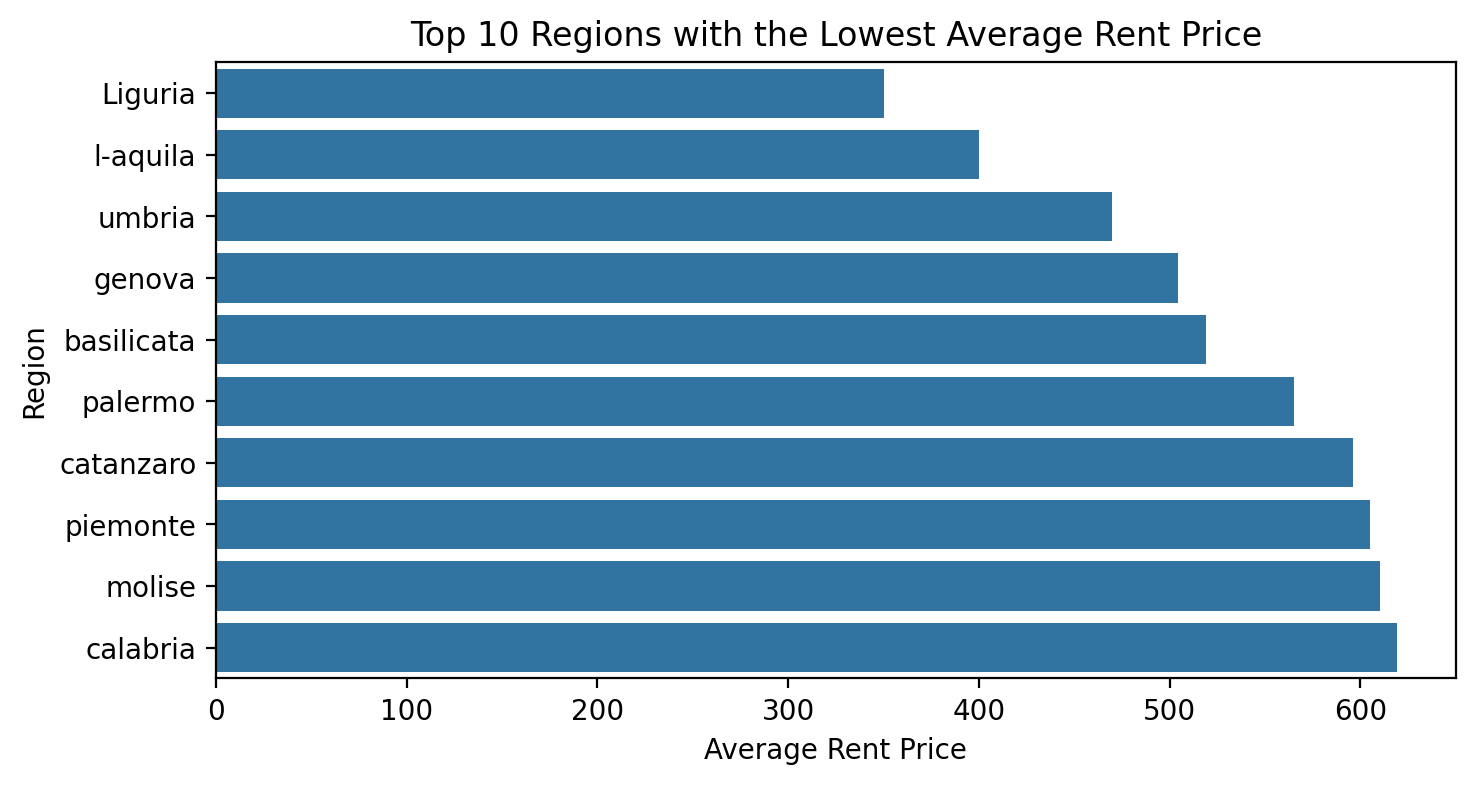

In [1950]:
top_10_regions_low = average_prices_by_region.head(10)
plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=top_10_regions_low.values, y=top_10_regions_low.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Region')
plt.title('Top 10 Regions with the Lowest Average Rent Price')
plt.show()

In [1951]:
df_filtered_outliers['price'].describe()

count   64,658.00
mean     1,036.57
std        870.58
min          1.00
25%        550.00
50%        750.00
75%      1,200.00
max      9,999.00
Name: price, dtype: float64

In [1952]:
fig = px.box(df_filtered_outliers, y='price')
fig.show()

In [1953]:
df_filtered_outliers['energy class'].value_counts()

energy class
G    26641
C     8139
F     7625
E     6343
D     6184
A     5925
B     3704
,       97
Name: count, dtype: int64

In [1954]:
# Drop the energy column with value ','
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['energy class'] != ',']

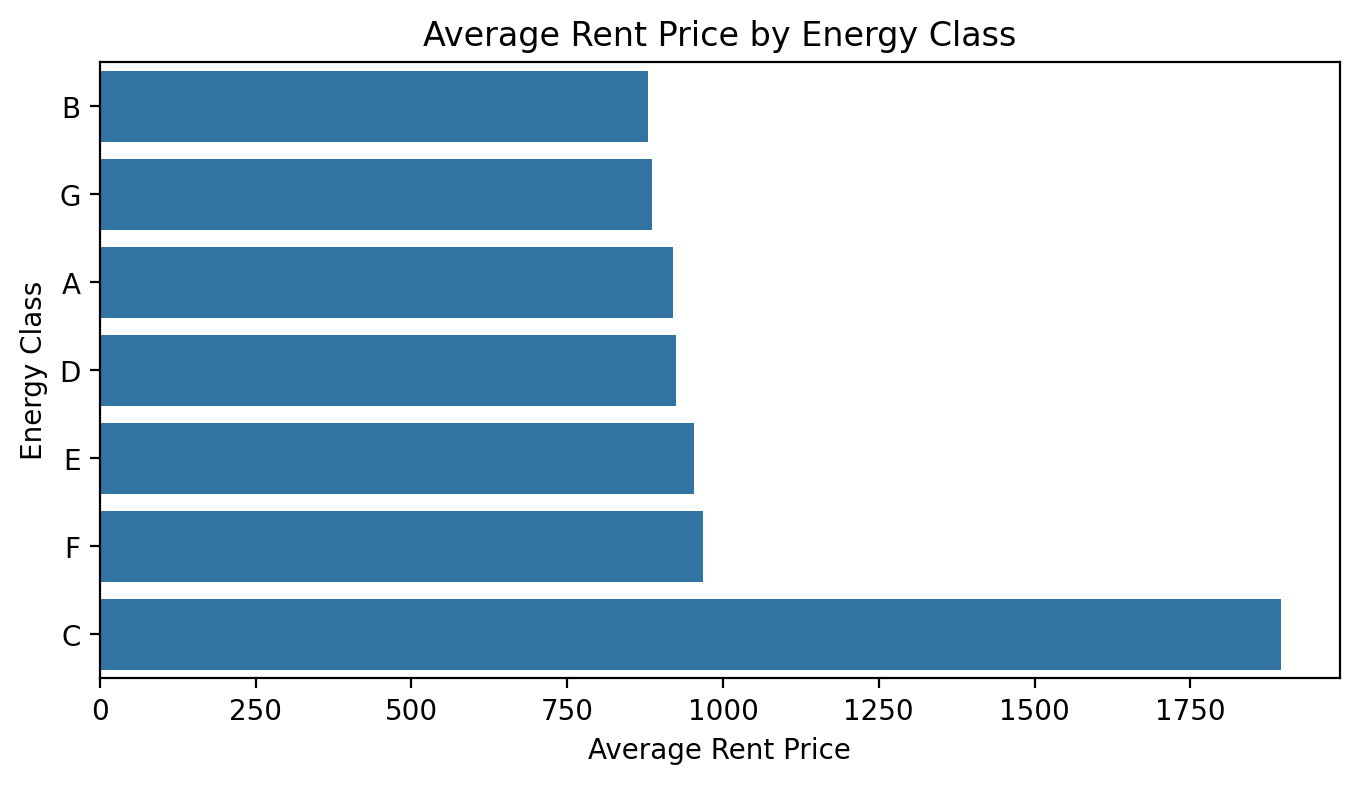

In [1955]:
average_prices_by_energy_class = df_filtered_outliers.groupby('energy class')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_energy_class.values, y=average_prices_by_energy_class.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Energy Class')
plt.title('Average Rent Price by Energy Class')
plt.show()

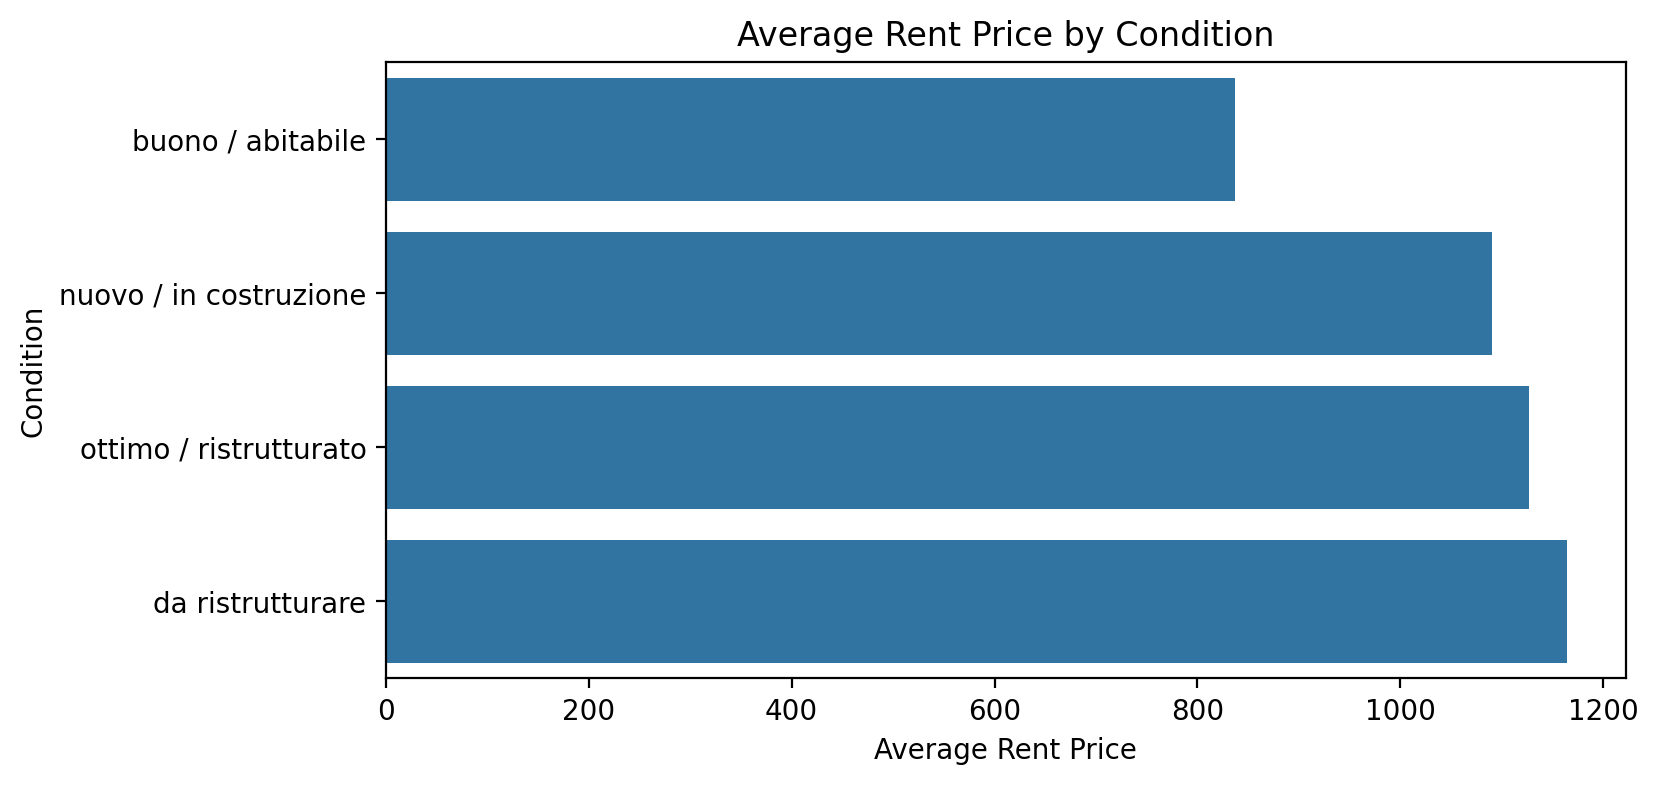

In [1956]:
average_prices_by_condition = df_filtered_outliers.groupby('condition')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_condition.values, y=average_prices_by_condition.index)
plt.xlabel('Average Rent Price')
plt.ylabel('Condition')
plt.title('Average Rent Price by Condition')
plt.show()

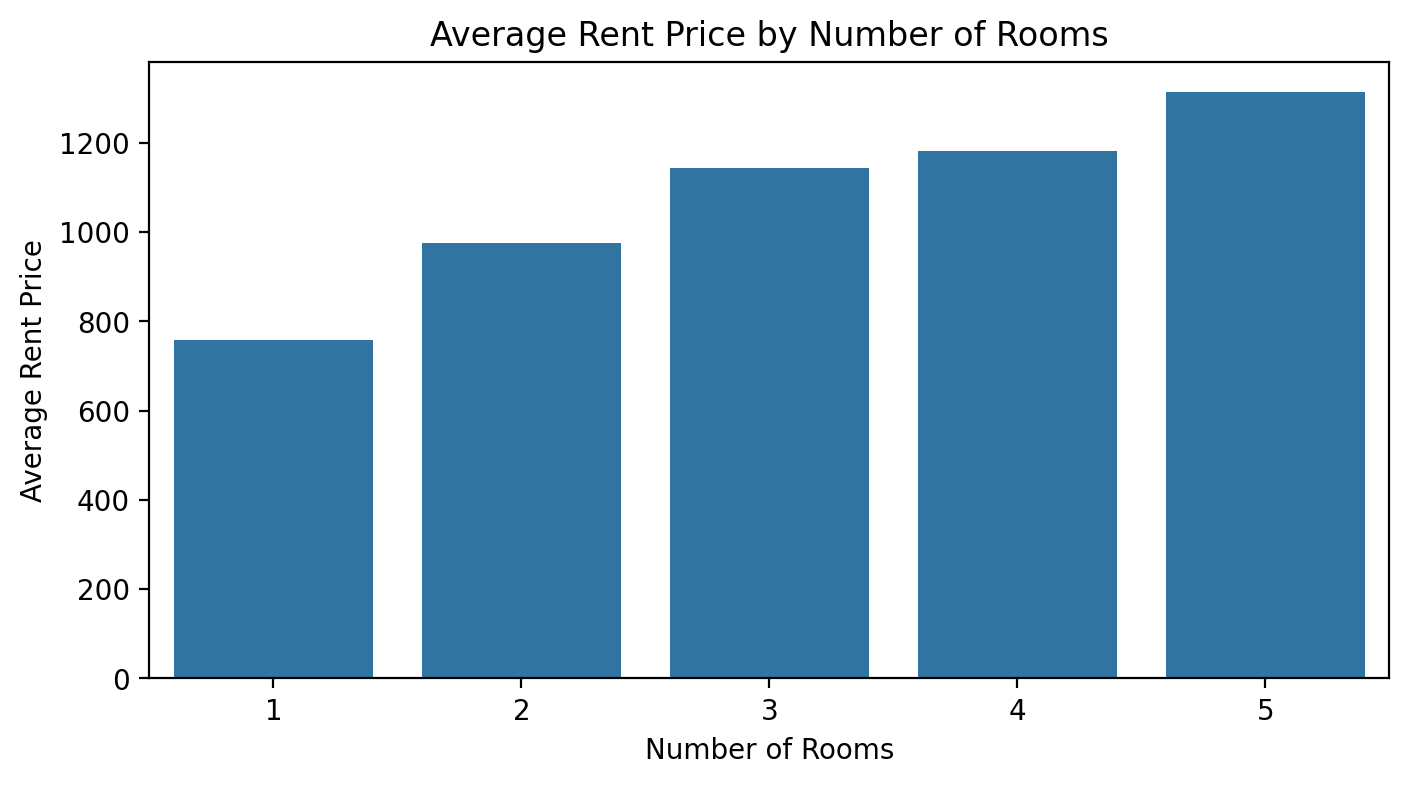

In [1957]:
average_prices_by_rooms = df_filtered_outliers.groupby('rooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_rooms.index, y=average_prices_by_rooms.values)
plt.xlabel('Number of Rooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Rooms')
plt.show()

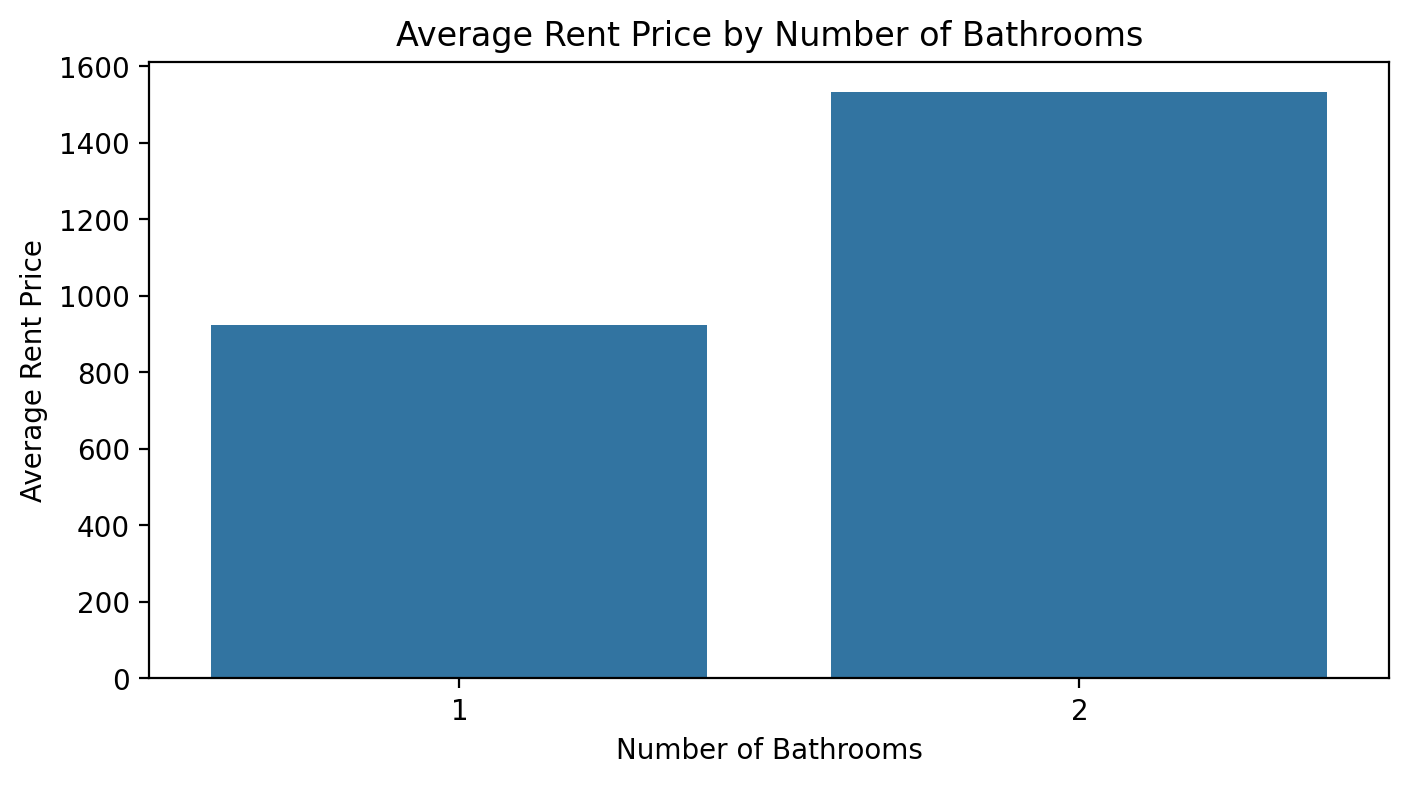

In [1958]:
average_prices_by_bathrooms = df_filtered_outliers.groupby('bathrooms')['price'].mean().sort_values()

plt.figure(figsize=(8, 4), dpi=200)
sns.barplot(x=average_prices_by_bathrooms.index, y=average_prices_by_bathrooms.values)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Rent Price')
plt.title('Average Rent Price by Number of Bathrooms')
plt.show()

### Regression Plot

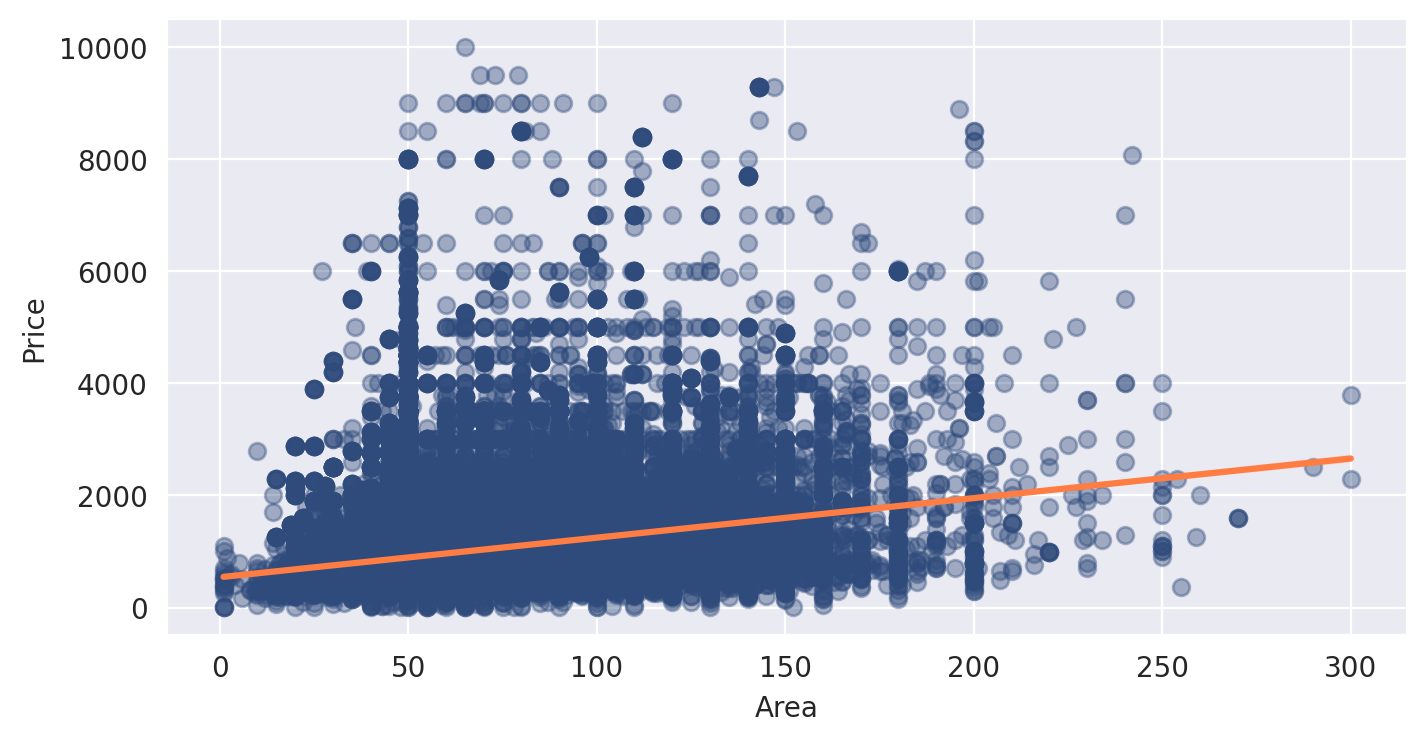

In [1959]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
  ax= sns.regplot(data=df_filtered_outliers,
            x='area',
            y='price',
            scatter_kws = {'alpha': 0.4,'color': "#2f4b7c"},
            line_kws = {'color': '#ff7c43'})


  ax.set(
        ylabel='Price',
        xlabel='Area',)


## Train Model using Linear Regression

In [1960]:
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'datetime', 'parking spots',
       'bathrooms per room', 'bathrooms', 'rooms', 'top floor', 'condition',
       'energy class', 'central heating', 'area', 'furnished', 'balcony',
       'external exposure', 'fiber optic', 'electric gate', 'cellar',
       'shared garden'],
      dtype='object')

In [1961]:
# Drop unnecessary columns
df_filtered_outliers.drop(['datetime', 'bathrooms per room'], axis=1, inplace=True)

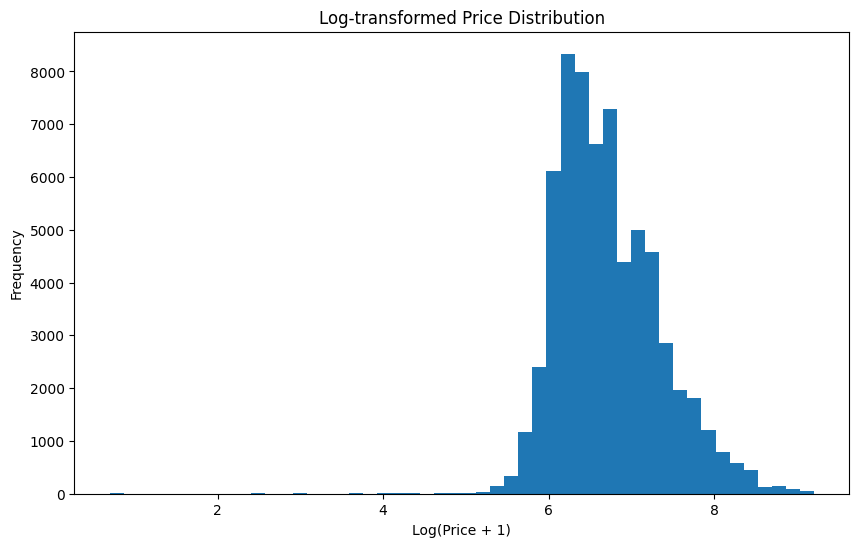

In [1962]:
# Fixing the skewness of the price column
log_price = np.log1p(df_filtered_outliers['price'])

plt.figure(figsize=(10,6))
plt.hist(log_price, bins=50)
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Frequency')
plt.show()

In [1963]:
# # Replace the price column with the log transformed price
df_filtered_outliers['price'] = log_price

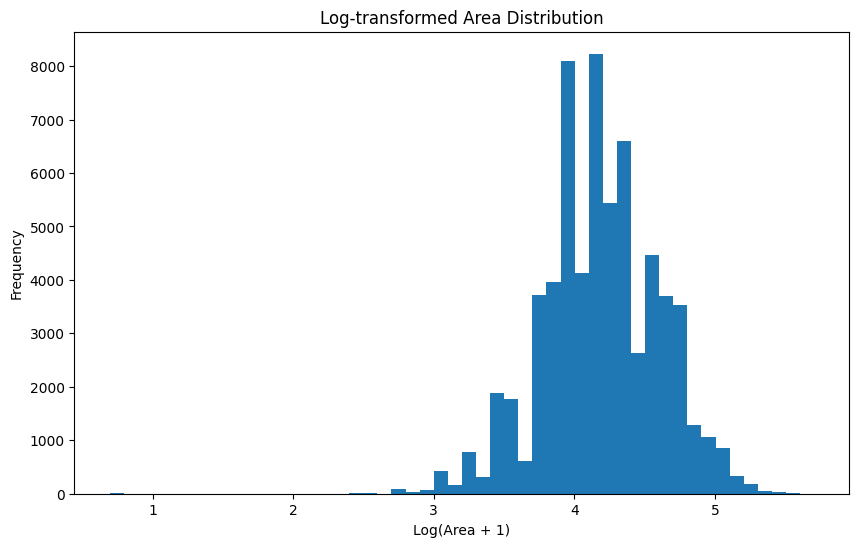

In [1964]:
# Fixing the skewness of the area column
log_price = np.log1p(df_filtered_outliers['area'])

plt.figure(figsize=(10,6))
plt.hist(log_price, bins=50)
plt.title('Log-transformed Area Distribution')
plt.xlabel('Log(Area + 1)')
plt.ylabel('Frequency')
plt.show()

In [1965]:
# # Replace the area column with the log transformed price
df_filtered_outliers['area'] = log_price

In [1966]:
# Count values of each region
df_filtered_outliers['region'].value_counts()

region
lombardia                15776
lazio                    11678
piemonte                  8312
emilia-romagna            7579
veneto                    3881
liguria                   3523
toscana                   3346
campania                  3132
sicilia                   1515
marche                    1477
umbria                    1326
puglia                     935
abruzzo                    659
trentino-alto-adige        400
calabria                   348
sardegna                   184
friuli-venezia-giulia      129
basilicata                  94
valle-d-aosta               90
molise                      76
emilia-Romagna              49
trieste                     18
catanzaro                   16
genova                       7
palermo                      2
venezia                      2
napoli                       2
Liguria                      1
milano                       1
torino                       1
l-aquila                     1
bari                         1
N

In [1967]:
# Replace all the regions with less than 1000 properties with 'Other'
regions_to_replace = df_filtered_outliers['region'].value_counts()[df_filtered_outliers['region'].value_counts() < 1000].index
df_filtered_outliers['region'] = df_filtered_outliers['region'].replace(regions_to_replace, 'Other')

df_filtered_outliers['region'].value_counts()


region
lombardia         15776
lazio             11678
piemonte           8312
emilia-romagna     7579
veneto             3881
liguria            3523
toscana            3346
campania           3132
Other              3016
sicilia            1515
marche             1477
umbria             1326
Name: count, dtype: int64

In [1968]:
# Count values of each city
df_filtered_outliers['city'].value_counts()

city
Milano                 11606
Roma                    8838
Torino                  3823
Bologna                 2472
Genova                  2136
                       ...  
Frabosa Soprana            1
Dossena                    1
Persico Dosimo             1
Romano di Lombardia        1
Laveno-Mombello            1
Name: count, Length: 2913, dtype: int64

In [1969]:
# Replace all the cities with less than 2000 properties with 'Other'
regions_to_replace = df_filtered_outliers['city'].value_counts()[df_filtered_outliers['city'].value_counts() < 300].index
df_filtered_outliers['city'] = df_filtered_outliers['city'].replace(regions_to_replace, 'Other')

df_filtered_outliers['city'].value_counts()

city
Other            26811
Milano           11606
Roma              8838
Torino            3823
Bologna           2472
Genova            2136
Firenze           1469
Napoli            1156
Perugia            723
Parma              712
Padova             652
Verona             586
Venezia            581
Pisa               436
Novara             423
Palermo            408
Ferrara            368
Reggio Emilia      366
Modena             364
Riccione           324
Catanzaro          307
Name: count, dtype: int64

In [1970]:
df_data['neighborhood'].value_counts()

neighborhood
Centro Storico              2385
Via Roma                     677
Centro                       554
Città Studi                  435
Navigli - Darsena            391
                            ... 
Frazione Scagnelli             1
Via Felice Isnardi             1
San Desiderio                  1
Piazza Ulisse Calvi, snc       1
Via Gian Lorenzo Bernini       1
Name: count, Length: 11798, dtype: int64

In [1971]:
# Replace all the neighborhoods with less than 50 properties with 'Other'
regions_to_replace = df_filtered_outliers['neighborhood'].value_counts()[df_filtered_outliers['neighborhood'].value_counts() < 50].index
df_filtered_outliers['neighborhood'] = df_filtered_outliers['neighborhood'].replace(regions_to_replace, 'Other')

df_filtered_outliers['neighborhood'].value_counts()

neighborhood
Other                       33400
Centro Storico               2227
Via Roma                      625
Centro                        506
Città Studi                   417
                            ...  
Rivarolo                       50
Borgo Rovereto - Piscina       50
Tre Castelli - Faenza          50
Sant'Agnese - Università       50
Ponte Mammolo                  50
Name: count, Length: 269, dtype: int64

In [1972]:
df_filtered_outliers['condition'].value_counts()

condition
ottimo / ristrutturato    42487
buono / abitabile         19956
nuovo / in costruzione     1893
da ristrutturare            225
Name: count, dtype: int64

In [1973]:
# Drop all the condition columns with the value nuovo / in costruzione and da ristrutturare
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['condition'] != 'nuovo / in costruzione']
df_filtered_outliers = df_filtered_outliers[df_filtered_outliers['condition'] != 'da ristrutturare']

df_filtered_outliers['condition'].value_counts()

condition
ottimo / ristrutturato    42487
buono / abitabile         19956
Name: count, dtype: int64

In [1974]:
df_filtered_outliers['energy class'].value_counts()

energy class
G    26183
C     7965
F     7517
E     6186
D     6017
A     5077
B     3498
Name: count, dtype: int64

In [1975]:
# Replace A, B, C with 1, D, E with 0 and F, G with -1
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['A', 'B', 'C'], 1)
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['D', 'E'], 0)
df_filtered_outliers['energy class'] = df_filtered_outliers['energy class'].replace(['F', 'G'], -1)

df_filtered_outliers['energy class'].value_counts()

C:\Users\ahame\AppData\Local\Temp\ipykernel_7568\1270191804.py:4: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



energy class
-1    33700
 1    16540
 0    12203
Name: count, dtype: int64

In [1976]:
df_filtered_outliers['top floor'].value_counts()

top floor
0    53977
1     8466
Name: count, dtype: int64

In [1977]:
df_filtered_outliers['cellar'].value_counts()

cellar
0    49947
1    12496
Name: count, dtype: int64

In [1978]:
df_filtered_outliers['Building Layout'] = np.select(
    [
        (df_filtered_outliers['cellar'] == 0) & (df_filtered_outliers['top floor'] == 0),
        (df_filtered_outliers['cellar'] == 1) & (df_filtered_outliers['top floor'] == 0),
        (df_filtered_outliers['cellar'] == 0) & (df_filtered_outliers['top floor'] == 1),
        (df_filtered_outliers['cellar'] == 1) & (df_filtered_outliers['top floor'] == 1)
    ],
    [
        0,  # No cellar or top floor
        1,  # Cellar only
        2,  # Top floor only
        3   # Both cellar and top floor
    ]
)

# Display the first few rows to verify the new feature
df_filtered_outliers[['cellar', 'top floor', 'Building Layout']].head()

cellar  top floor  Building Layout
13       0          0                0
15       0          0                0
16       0          0                0
19       0          0                0
20       0          0                0

In [1979]:
df_filtered_outliers.drop(['cellar', 'top floor'], axis=1, inplace=True)
df_filtered_outliers['Building Layout'].value_counts()

Building Layout
0    43084
1    10893
2     6863
3     1603
Name: count, dtype: int64

In [1980]:
df_filtered_outliers.columns

Index(['region', 'city', 'neighborhood', 'price', 'parking spots', 'bathrooms',
       'rooms', 'condition', 'energy class', 'central heating', 'area',
       'furnished', 'balcony', 'external exposure', 'fiber optic',
       'electric gate', 'shared garden', 'Building Layout'],
      dtype='object')

In [1981]:
# Add a feature - Is both furnished and has central heating
df_filtered_outliers['Furnished and Central Heating'] = np.where((df_filtered_outliers['furnished'] == 1) & (df_filtered_outliers['central heating'] == 1), 1, 0)
df_filtered_outliers.head()

region       city           neighborhood  price  parking spots  \
13        piemonte     Torino        Via della Rocca   6.22              0   
15  emilia-romagna    Bologna  Saragozza fuori Porta   6.72              1   
16         liguria     Genova                  Other   6.31              0   
19           Other  Catanzaro                  Other   6.22              0   
20           Other      Other                  Other   6.22              1   

    bathrooms  rooms               condition  energy class  central heating  \
13          1      1       buono / abitabile             0                0   
15          1      2  ottimo / ristrutturato             0                1   
16          1      3  ottimo / ristrutturato            -1                0   
19          1      3  ottimo / ristrutturato            -1                0   
20          1      2       buono / abitabile            -1                0   

    area  furnished  balcony  external exposure  fiber optic  electric gate  \
13  3.58          1        0                  0            0              1   
15  3.81          1        0                  0            0              0   
16  4.11          1        0                  1            0              0   
19  4.51          1        1                  0            0              0   
20  4.26          0        1                  0            0              1   

    shared garden  Building Layout  Furnished and Central Heating  
13              0                0                              0  
15              0                0                              1  
16              0                0                              0  
19              0                0                              0  
20              0                0                              0

### Convert each region, city, neighborhood to LatLong

In [1982]:
# %pip install geopy

In [1983]:
from geopy.geocoders import Nominatim

In [1984]:
df_filtered_outliers['region'].unique()

array(['piemonte', 'emilia-romagna', 'liguria', 'Other', 'veneto',
       'lombardia', 'lazio', 'sicilia', 'umbria', 'toscana', 'campania',
       'marche'], dtype=object)

In [1985]:
# List all the unique columns in the region column ignore the 'Other' column
unique_regions = df_filtered_outliers['region'].unique()
unique_regions = unique_regions[unique_regions != 'Other']

# Create a dictionary to store the latitude and longitude of each region
region_coordinates = {}

# Create a geolocator object
geolocator = Nominatim(user_agent='geoapi')

# Loop through each region and get the latitude and longitude
for region in unique_regions:
    location = geolocator.geocode(region)
    region_coordinates[region] = (location.latitude, location.longitude)
    
region_coordinates

{'piemonte': (45.060735, 7.923549),
 'emilia-romagna': (44.525696, 11.039437),
 'liguria': (44.4777617, 8.7026296),
 'veneto': (45.6476663, 11.8665254),
 'lombardia': (45.5703694, 9.7732524),
 'lazio': (41.9808038, 12.7662312),
 'sicilia': (37.587794, 14.155048),
 'umbria': (42.965916, 12.490236),
 'toscana': (43.4586541, 11.1389204),
 'campania': (40.860672, 14.843984),
 'marche': (43.3458388, 13.1415872)}

In [1986]:
# Find the mean of all the regions latitude and longitude and use it as the latitude and longitude of 'Other'
latitude = sum([coord[0] for coord in region_coordinates.values()]) / len(region_coordinates)
longitude = sum([coord[1] for coord in region_coordinates.values()]) / len(region_coordinates)

region_coordinates['Other'] = (latitude, longitude)

region_coordinates

{'piemonte': (45.060735, 7.923549),
 'emilia-romagna': (44.525696, 11.039437),
 'liguria': (44.4777617, 8.7026296),
 'veneto': (45.6476663, 11.8665254),
 'lombardia': (45.5703694, 9.7732524),
 'lazio': (41.9808038, 12.7662312),
 'sicilia': (37.587794, 14.155048),
 'umbria': (42.965916, 12.490236),
 'toscana': (43.4586541, 11.1389204),
 'campania': (40.860672, 14.843984),
 'marche': (43.3458388, 13.1415872),
 'Other': (43.22562791818182, 11.621945472727273)}

In [2058]:
# # Save the region coordinates to a file
# import json

# with open('coordinates/region_coordinates.json', 'w') as f:
#     json.dump(region_coordinates, f)

In [1987]:
# Add 2 new columns to the dataframe - latitude and longitude
df_filtered_outliers['latitude'] = df_filtered_outliers['region'].map(lambda x: region_coordinates[x][0])
df_filtered_outliers['longitude'] = df_filtered_outliers['region'].map(lambda x: region_coordinates[x][1])

# Drop the region column
df_filtered_outliers.drop('region', axis=1, inplace=True)

df_filtered_outliers.head()

city           neighborhood  price  parking spots  bathrooms  rooms  \
13     Torino        Via della Rocca   6.22              0          1      1   
15    Bologna  Saragozza fuori Porta   6.72              1          1      2   
16     Genova                  Other   6.31              0          1      3   
19  Catanzaro                  Other   6.22              0          1      3   
20      Other                  Other   6.22              1          1      2   

                 condition  energy class  central heating  area  furnished  \
13       buono / abitabile             0                0  3.58          1   
15  ottimo / ristrutturato             0                1  3.81          1   
16  ottimo / ristrutturato            -1                0  4.11          1   
19  ottimo / ristrutturato            -1                0  4.51          1   
20       buono / abitabile            -1                0  4.26          0   

    balcony  external exposure  fiber optic  electric gate  shared garden  \
13        0                  0            0              1              0   
15        0                  0            0              0              0   
16        0                  1            0              0              0   
19        1                  0            0              0              0   
20        1                  0            0              1              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  
13                0                              0     45.06       7.92  
15                0                              1     44.53      11.04  
16                0                              0     44.48       8.70  
19                0                              0     43.23      11.62  
20                0                              0     43.23      11.62

In [1988]:
df_filtered_outliers['city'].unique()

array(['Torino', 'Bologna', 'Genova', 'Catanzaro', 'Other', 'Milano',
       'Roma', 'Padova', 'Palermo', 'Novara', 'Verona', 'Modena', 'Parma',
       'Pisa', 'Firenze', 'Napoli', 'Perugia', 'Venezia', 'Ferrara',
       'Riccione', 'Reggio Emilia'], dtype=object)

In [1989]:
# List all the unique columns in the city column ignore the 'Other' column
unique_cities = df_filtered_outliers['city'].unique()
unique_cities = unique_cities[unique_cities != 'Other']

# Create a dictionary to store the latitude and longitude of each region
city_coordinates = {}

# Loop through each region and get the latitude and longitude
for city in unique_cities:
    location = geolocator.geocode(city)
    city_coordinates[city] = (location.latitude, location.longitude)

In [1990]:
# Find the mean of all the regions latitude and longitude and use it as the latitude and longitude of 'Other'
latitude = sum([coord[0] for coord in city_coordinates.values()]) / len(city_coordinates)
longitude = sum([coord[1] for coord in city_coordinates.values()]) / len(city_coordinates)

city_coordinates['Other'] = (latitude, longitude)

city_coordinates

{'Torino': (45.0677551, 7.6824892),
 'Bologna': (44.4938203, 11.3426327),
 'Genova': (44.40726, 8.9338624),
 'Catanzaro': (38.82996034999999, 16.43155687627833),
 'Milano': (45.4641943, 9.1896346),
 'Roma': (41.8933203, 12.4829321),
 'Padova': (45.391408, 11.805848677115883),
 'Palermo': (38.1112268, 13.3524434),
 'Novara': (45.584250049999994, 8.545996970894572),
 'Verona': (45.442497700000004, 10.985737689444763),
 'Modena': (44.5384728, 10.935960870530739),
 'Parma': (44.8013678, 10.3280833),
 'Pisa': (43.4714722, 10.679791173704576),
 'Firenze': (43.7697955, 11.2556404),
 'Napoli': (40.8358846, 14.2487679),
 'Perugia': (43.1070321, 12.402996209906487),
 'Venezia': (45.4371908, 12.3345898),
 'Ferrara': (44.766764249999994, 11.827938995640167),
 'Riccione': (43.998274, 12.6474368),
 'Reggio Emilia': (44.6086674, 10.594066675914796),
 'Other': (43.7010307175, 11.400420336971516)}

In [2057]:
# # Save the city coordinates to a file
# import json

# with open('coordinates/city_coordinates.json', 'w') as f:
#     json.dump(city_coordinates, f)

In [1991]:
# Add 2 new columns to the dataframe - latitude_city and longitude_city
df_filtered_outliers['latitude_city'] = df_filtered_outliers['city'].map(lambda x: city_coordinates[x][0])
df_filtered_outliers['longitude_city'] = df_filtered_outliers['city'].map(lambda x: city_coordinates[x][1])

# Drop the region column
df_filtered_outliers.drop('city', axis=1, inplace=True)

df_filtered_outliers.head()

neighborhood  price  parking spots  bathrooms  rooms  \
13        Via della Rocca   6.22              0          1      1   
15  Saragozza fuori Porta   6.72              1          1      2   
16                  Other   6.31              0          1      3   
19                  Other   6.22              0          1      3   
20                  Other   6.22              1          1      2   

                 condition  energy class  central heating  area  furnished  \
13       buono / abitabile             0                0  3.58          1   
15  ottimo / ristrutturato             0                1  3.81          1   
16  ottimo / ristrutturato            -1                0  4.11          1   
19  ottimo / ristrutturato            -1                0  4.51          1   
20       buono / abitabile            -1                0  4.26          0   

    ...  external exposure  fiber optic  electric gate  shared garden  \
13  ...                  0            0              1              0   
15  ...                  0            0              0              0   
16  ...                  1            0              0              0   
19  ...                  0            0              0              0   
20  ...                  0            0              1              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  \
13                0                              0     45.06       7.92   
15                0                              1     44.53      11.04   
16                0                              0     44.48       8.70   
19                0                              0     43.23      11.62   
20                0                              0     43.23      11.62   

    latitude_city  longitude_city  
13          45.07            7.68  
15          44.49           11.34  
16          44.41            8.93  
19          38.83           16.43  
20          43.70           11.40  

[5 rows x 21 columns]

In [1992]:
df_filtered_outliers['neighborhood'].unique()

array(['Via della Rocca', 'Saragozza fuori Porta', 'Other', 'Santa Maria',
       'Catanzaro Lido', 'Centro Storico', 'Centro', 'San Leonardo',
       'Quadrilatero Romano', 'Cittadella', 'Giardini Reali',
       'Portello - Parco Vittoria', 'Bologna', 'Casal Bruciato', 'Pagano',
       'Giambellino', 'Piazze - Duomo', 'Pasteur', 'Plebisciti - Susa',
       'Garibaldi - Corso Como', 'Navigli - Darsena', 'Vincenzo Monti',
       'Morgagni', 'Vigentino - Fatima', 'Bocconi', 'Buenos Aires',
       'Vanchiglia', 'Crocetta', 'Via Camillo Benso di Cavour',
       "Sant'Agnese - Università", 'San Felice', 'Via Giuseppe Garibaldi',
       'Corticella', 'Bolognina', 'Parco Ducale - Oltretorrente',
       'San Vitale', 'Ospedale - Volturno', 'San Marco - SS Annunziata',
       'Le Cure', 'Signoria - Uffizi', 'Esquilino',
       'Vigna Clara - Vigna Stelluti', 'Piazza Navona', 'Furio Camillo',
       'Torrino', 'Castelletto', 'Molo', 'Ticinese', 'Pezzotti - Meda',
       'Mirafiori Sud - Onorato 

In [1994]:
# List all the unique columns in the neighborhood column ignore the 'Other' column
unique_neighborhoods = df_filtered_outliers['neighborhood'].unique()
unique_neighborhoods = unique_neighborhoods[unique_neighborhoods != 'Other']

# Create a dictionary to store the latitude and longitude of each region
neighborhood_coordinates = {}

# Loop through each region and get the latitude and longitude
for neighborhood in unique_neighborhoods:
    location = geolocator.geocode(neighborhood)
    if location:
        neighborhood_coordinates[neighborhood] = (location.latitude, location.longitude)
    else:
        print(f"Geocoding failed for neighborhood: {neighborhood}")


Geocoding failed for neighborhood: Saragozza fuori Porta
Geocoding failed for neighborhood: Piazze - Duomo
Geocoding failed for neighborhood: Plebisciti - Susa
Geocoding failed for neighborhood: Signoria - Uffizi
Geocoding failed for neighborhood: Pezzotti - Meda
Geocoding failed for neighborhood: Vercelli - Wagner
Geocoding failed for neighborhood: Mazzini - Delle Vittorie
Geocoding failed for neighborhood: Gregorio VII - Piccolomini
Geocoding failed for neighborhood: Colli Portuensi - Casaletto
Geocoding failed for neighborhood: Borgo Rovereto - Piscina
Geocoding failed for neighborhood: Pinciano - Villa Ada
Geocoding failed for neighborhood: Monteverde Vecchio
Geocoding failed for neighborhood: Africano - Villa Chigi
Geocoding failed for neighborhood: Piave - Tricolore
Geocoding failed for neighborhood: Cermenate - Abbiategrasso
Geocoding failed for neighborhood: Martini - Insubria
Geocoding failed for neighborhood: Saragozza dentro le Mura
Geocoding failed for neighborhood: Pablo -

In [1995]:
neighborhood_coordinates['Saragozza fuori Porta'] = (44.4944, 11.3426)
neighborhood_coordinates['Piazze - Duomo'] = (45.4064, 11.8768)
neighborhood_coordinates['Plebisciti - Susa'] = (45.4642, 9.1900)
neighborhood_coordinates['Signoria - Uffizi'] = (43.7696, 11.2558)
neighborhood_coordinates['Pezzotti - Meda'] = (45.4440, 9.1859)
neighborhood_coordinates['Vercelli - Wagner'] = (45.4668, 9.1570)
neighborhood_coordinates['Mazzini - Delle Vittorie'] = (41.9220, 12.4668)
neighborhood_coordinates['Gregorio VII - Piccolomini'] = (41.8963, 12.4500)
neighborhood_coordinates['Colli Portuensi - Casaletto'] = (41.8737, 12.4403)
neighborhood_coordinates['Borgo Rovereto - Piscina'] = (44.9122, 8.6153)
neighborhood_coordinates['Pinciano - Villa Ada'] = (41.9228, 12.4924)
neighborhood_coordinates['Monteverde Vecchio'] = (41.8776, 12.4545)
neighborhood_coordinates['Africano - Villa Chigi'] = (41.9322, 12.5223)
neighborhood_coordinates['Piave - Tricolore'] = (45.4642, 9.1900)
neighborhood_coordinates['Cermenate - Abbiategrasso'] = (45.4340, 9.1700)
neighborhood_coordinates['Martini - Insubria'] = (45.4570, 9.2040)
neighborhood_coordinates['Saragozza dentro le Mura'] = (44.4944, 11.3426)
neighborhood_coordinates['Pablo - Prati Bocchi'] = (44.8015, 10.3279)
neighborhood_coordinates['Porta al Prato - San Jacopino'] = (43.7793, 11.2395)
neighborhood_coordinates['Ponte Vecchio - Pitti'] = (43.7678, 11.2531)



In [1996]:
# Find the mean of all the regions latitude and longitude and use it as the latitude and longitude of 'Other'
latitude = sum([coord[0] for coord in neighborhood_coordinates.values()]) / len(neighborhood_coordinates)
longitude = sum([coord[1] for coord in neighborhood_coordinates.values()]) / len(neighborhood_coordinates)

neighborhood_coordinates['Other'] = (latitude, longitude)

neighborhood_coordinates

{'Via della Rocca': (44.6792779, 7.3693128),
 'Santa Maria': (-29.6860512, -53.8069214),
 'Catanzaro Lido': (38.8216667, 16.6163211),
 'Centro Storico': (46.4996726, 11.3553737),
 'Centro': (47.5490251, 1.7324062),
 'San Leonardo': (46.12745925, 13.538374337525608),
 'Quadrilatero Romano': (45.0753343, 7.6797349),
 'Cittadella': (45.6487941, 11.7835801),
 'Giardini Reali': (45.5943941, 9.276623930138577),
 'Portello - Parco Vittoria': (45.486890450000004, 9.149842288599718),
 'Bologna': (44.4938203, 11.3426327),
 'Casal Bruciato': (41.9097937, 12.5505298),
 'Pagano': (45.4683019, 9.161102),
 'Giambellino': (45.4491788, 9.1440266),
 'Pasteur': (48.8429336, 2.3125906),
 'Garibaldi - Corso Como': (45.481742600000004, 9.187246796755764),
 'Navigli - Darsena': (45.45362865, 9.175585150681556),
 'Vincenzo Monti': (37.5840132, 13.7551426),
 'Morgagni': (45.4051525, 11.889636201506537),
 'Vigentino - Fatima': (45.421872, 9.2033197),
 'Bocconi': (44.0086222, 11.7442777),
 'Buenos Aires': (-34.6

In [2056]:
# # Save the neighborhood coordinates to a file
# import json

# with open('coordinates/neighborhood_coordinates.json', 'w') as f:
#     json.dump(neighborhood_coordinates, f)

In [2055]:
# Add 2 new columns to the dataframe - latitude_neighborhood and longitude_neighborhood
df_filtered_outliers['latitude_neighborhood'] = df_filtered_outliers['neighborhood'].map(lambda x: neighborhood_coordinates[x][0])
df_filtered_outliers['longitude_neighborhood'] = df_filtered_outliers['neighborhood'].map(lambda x: neighborhood_coordinates[x][1])

# Drop the region column
df_filtered_outliers.drop('neighborhood', axis=1, inplace=True)

df_filtered_outliers.head()

KeyError: 'neighborhood'

In [1998]:
encoded_df = pd.get_dummies(df_filtered_outliers, columns=['condition'], dtype=int, drop_first=True)

In [1999]:
encoded_df.head()

price  parking spots  bathrooms  rooms  energy class  central heating  \
13   6.22              0          1      1             0                0   
15   6.72              1          1      2             0                1   
16   6.31              0          1      3            -1                0   
19   6.22              0          1      3            -1                0   
20   6.22              1          1      2            -1                0   

    area  furnished  balcony  external exposure  ...  shared garden  \
13  3.58          1        0                  0  ...              0   
15  3.81          1        0                  0  ...              0   
16  4.11          1        0                  1  ...              0   
19  4.51          1        1                  0  ...              0   
20  4.26          0        1                  0  ...              0   

    Building Layout  Furnished and Central Heating  latitude  longitude  \
13                0                              0     45.06       7.92   
15                0                              1     44.53      11.04   
16                0                              0     44.48       8.70   
19                0                              0     43.23      11.62   
20                0                              0     43.23      11.62   

    latitude_city  longitude_city  latitude_neighborhood  \
13          45.07            7.68                  44.68   
15          44.49           11.34                  44.49   
16          44.41            8.93                  41.69   
19          38.83           16.43                  41.69   
20          43.70           11.40                  41.69   

    longitude_neighborhood  condition_ottimo / ristrutturato  
13                    7.37                                 0  
15                   11.34                                 1  
16                    9.21                                 1  
19                    9.21                                 1  
20                    9.21                                 0  

[5 rows x 22 columns]

In [2000]:
# Temporarily drop the categorical columns
# df_filtered_outliers.drop(['region', 'city', 'neighborhood', 'condition', 'energy class'], axis=1, inplace=True)

In [2001]:
# Temporarily drop the categorical columns
input_columns = df_filtered_outliers.columns

In [2002]:
input_columns = encoded_df.columns.drop('price')

In [2003]:
input_columns

Index(['parking spots', 'bathrooms', 'rooms', 'energy class',
       'central heating', 'area', 'furnished', 'balcony', 'external exposure',
       'fiber optic', 'electric gate', 'shared garden', 'Building Layout',
       'Furnished and Central Heating', 'latitude', 'longitude',
       'latitude_city', 'longitude_city', 'latitude_neighborhood',
       'longitude_neighborhood', 'condition_ottimo / ristrutturato'],
      dtype='object')

In [2004]:
from sklearn.model_selection import train_test_split

In [2005]:
X = pd.DataFrame(encoded_df, columns=input_columns)
y = pd.DataFrame(encoded_df, columns=['price'])

In [2006]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2007]:
train_data = X_train.join(y_train)

array([[<Axes: title={'center': 'parking spots'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'energy class'}>,
        <Axes: title={'center': 'central heating'}>],
       [<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'furnished'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'external exposure'}>,
        <Axes: title={'center': 'fiber optic'}>],
       [<Axes: title={'center': 'electric gate'}>,
        <Axes: title={'center': 'shared garden'}>,
        <Axes: title={'center': 'Building Layout'}>,
        <Axes: title={'center': 'Furnished and Central Heating'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude_city'}>,
        <Axes: title={'center': 'longitude_city'}>,
        <Axes: title={'center': 'latitude_neighborhood'}>,
        <Axes: title={'center': 'longi

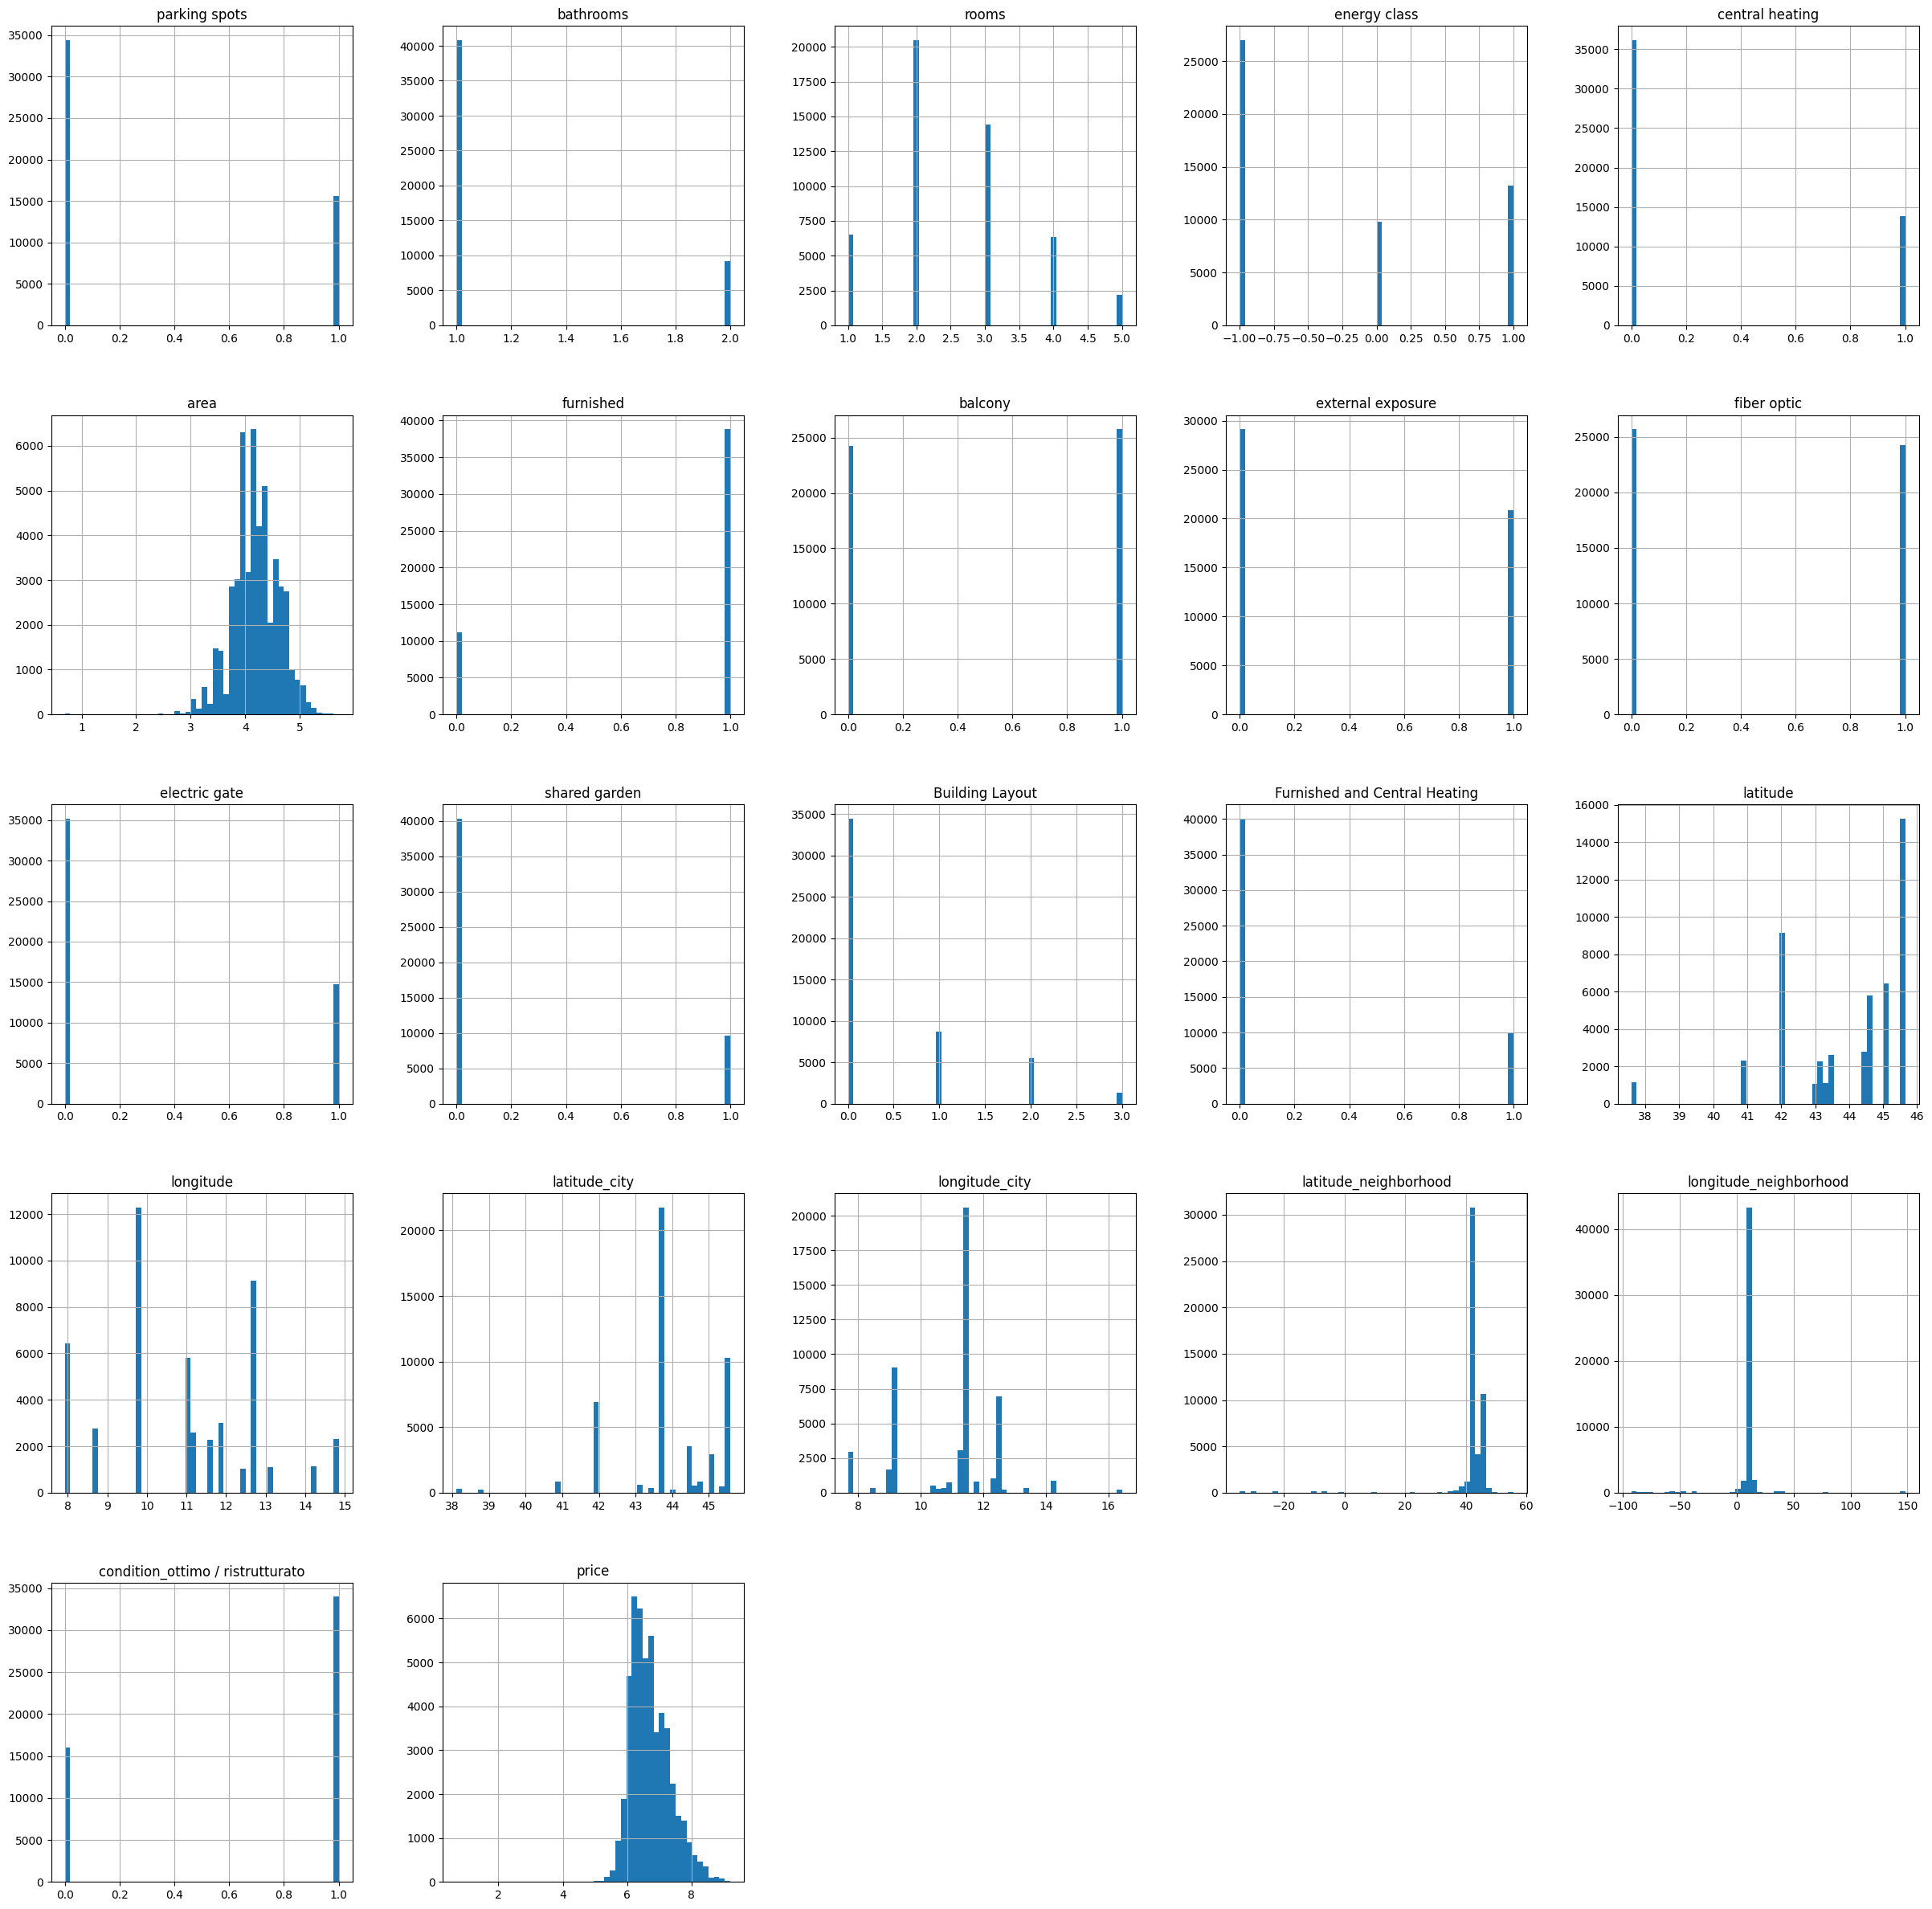

In [2008]:
train_data.hist(figsize=(30, 30), bins=50)

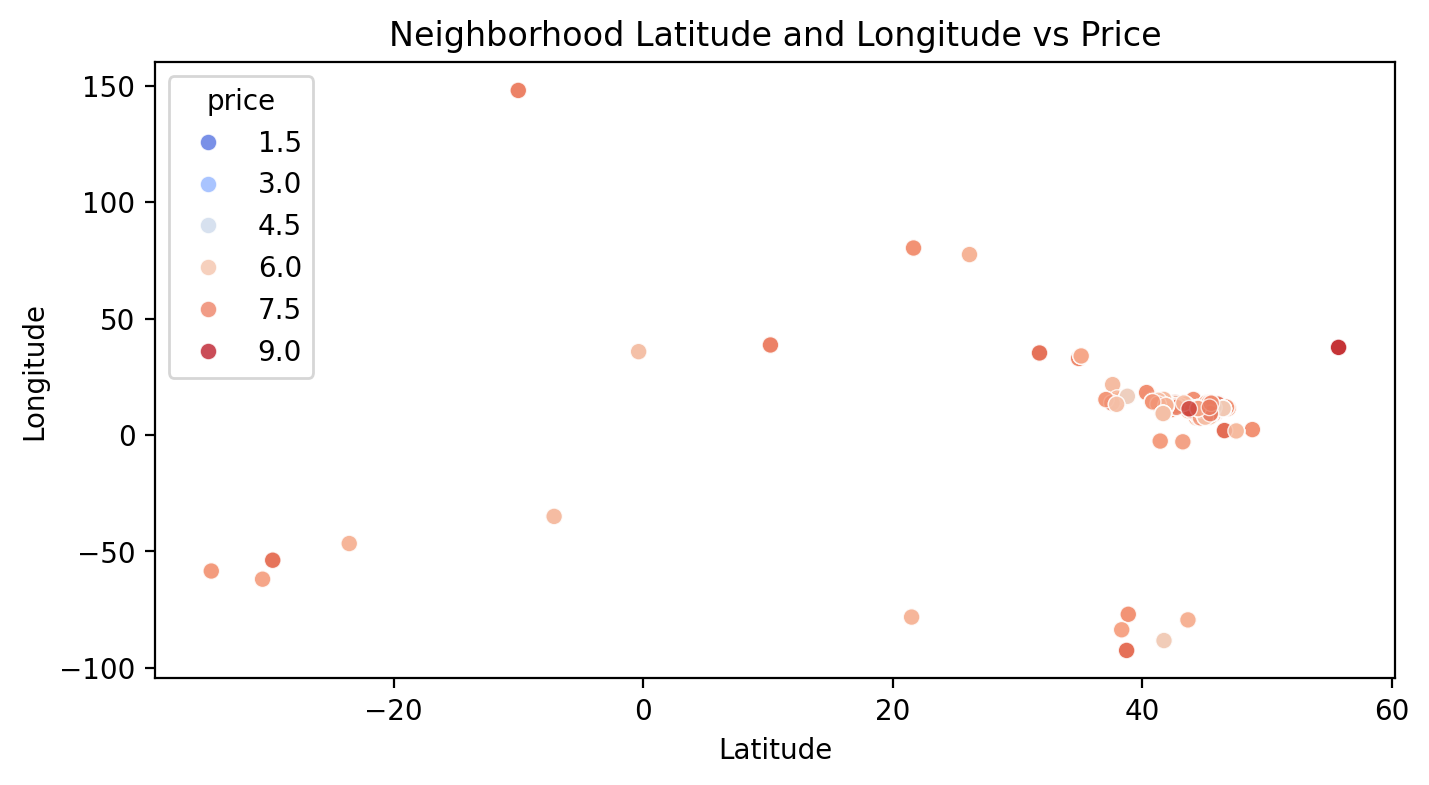

In [2070]:
#plot neihborhood latitude and longitude vs price in a scatter plot
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(data=train_data,
                x='latitude_neighborhood',
                y='longitude_neighborhood',
                hue='price',
                palette='coolwarm',
                alpha=0.8)

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Neighborhood Latitude and Longitude vs Price')
plt.show()

<Axes: >

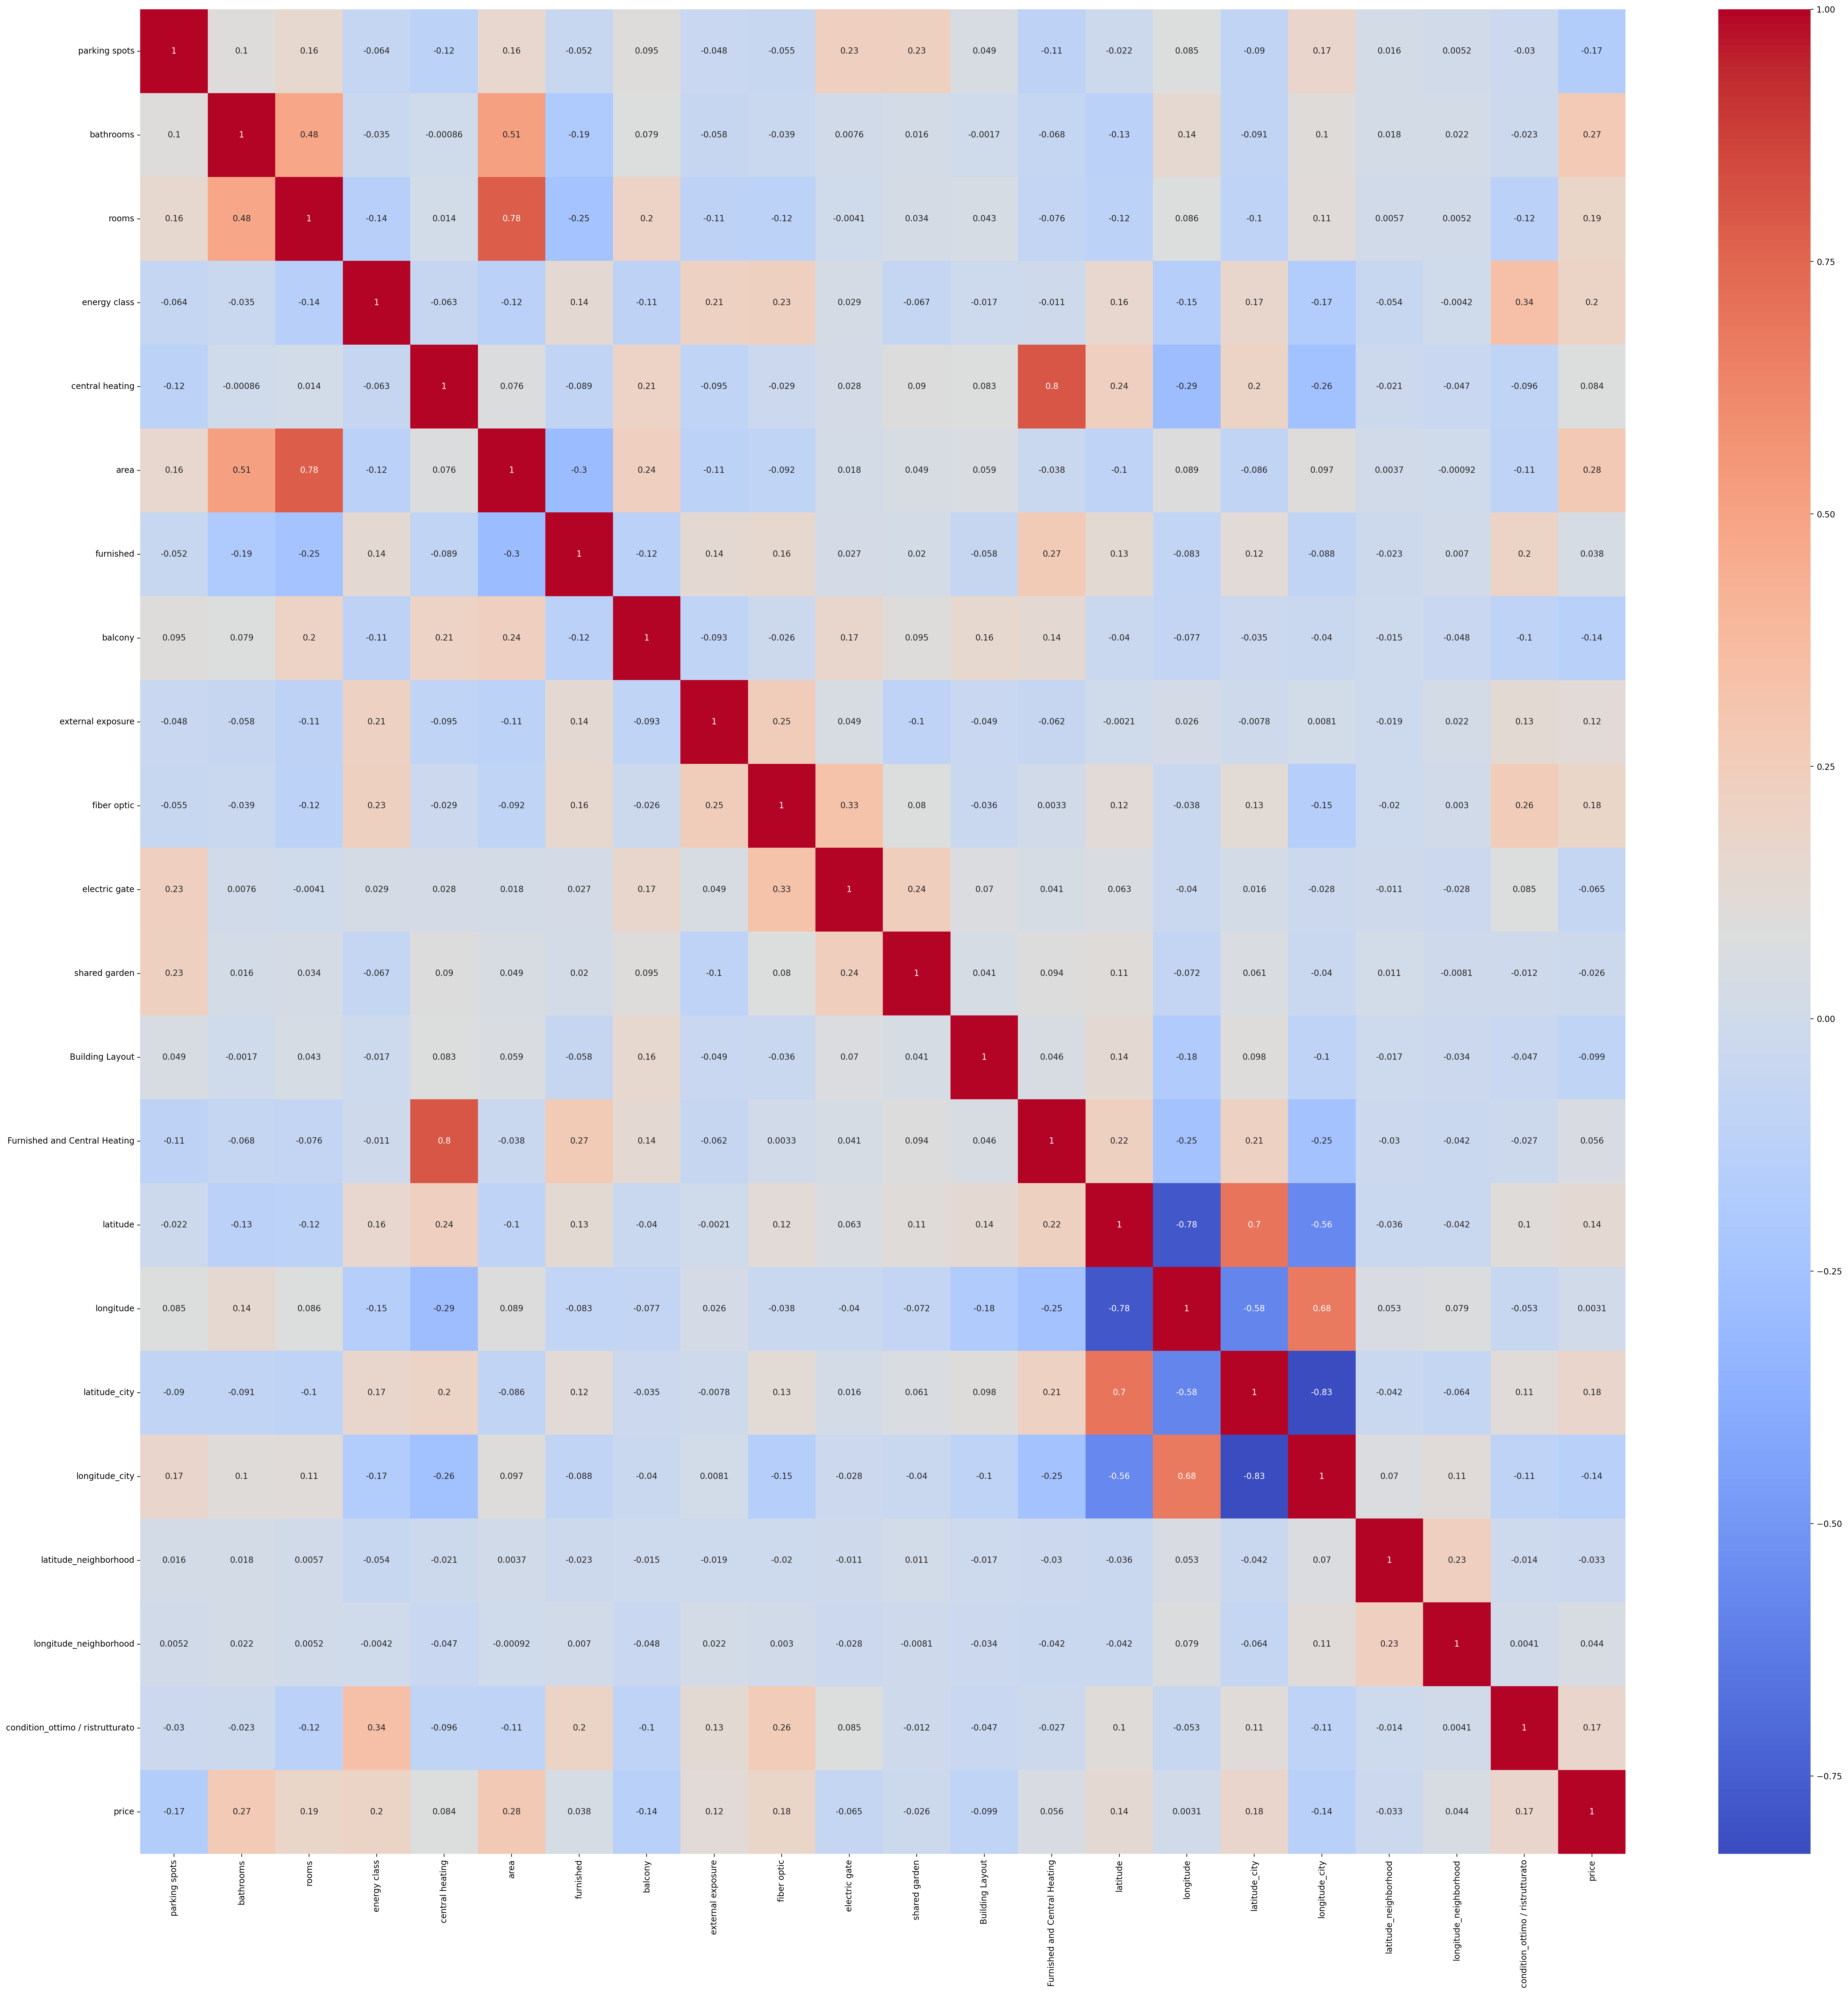

In [2069]:
plt.figure(figsize=(40, 40), dpi=200)
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')

In [2011]:
train_data.head()

parking spots  bathrooms  rooms  energy class  central heating  area  \
86782              0          1      3            -1                0  3.93   
47548              1          1      2            -1                0  4.26   
87618              0          1      2            -1                0  4.19   
3552               0          2      3             0                1  4.77   
67422              0          1      1             0                1  3.71   

       furnished  balcony  external exposure  fiber optic  ...  \
86782          0        1                  0            0  ...   
47548          1        0                  0            1  ...   
87618          1        1                  0            1  ...   
3552           1        1                  0            0  ...   
67422          1        0                  0            0  ...   

       Building Layout  Furnished and Central Heating  latitude  longitude  \
86782                2                              0     45.57       9.77   
47548                0                              0     44.48       8.70   
87618                0                              0     45.57       9.77   
3552                 0                              1     45.57       9.77   
67422                0                              1     45.57       9.77   

       latitude_city  longitude_city  latitude_neighborhood  \
86782          43.70           11.40                  47.55   
47548          44.41            8.93                  41.69   
87618          45.46            9.19                  45.52   
3552           45.46            9.19                  38.90   
67422          45.46            9.19                  45.48   

       longitude_neighborhood  condition_ottimo / ristrutturato  price  
86782                    1.73                                 0   6.22  
47548                    9.21                                 1   5.99  
87618                    9.17                                 0   6.91  
3552                   -77.04                                 1   7.70  
67422                    9.12                                 1   6.75  

[5 rows x 22 columns]

In [2012]:
# %pip install scikit-learn

## Prediction using RandomForestRegressor Algorithm

In [2013]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

forest.fit(X_train, y_train)
forest.score(X_test, y_test)

C:\Users\ahame\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py:1473: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



0.6822988262520537

In [2040]:
# from sklearn.model_selection import GridSearchCV

# param_grid = { 
#     'n_estimators': [200, 250, 300], #500
#     'max_features': [4, 8, 16], #8
#     'min_samples_split': [3,  6,  9] #6
# }

# grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

# grid_search.fit(X_train, y_train)

# print(grid_search.best_estimator_)
# grid_search.best_estimator_.score(X_test, y_test)

C:\Users\ahame\AppData\Roaming\Python\Python313\site-packages\numpy\ma\core.py:2881: RuntimeWarning:

invalid value encountered in cast



RandomForestRegressor(max_features=8, min_samples_split=8, n_estimators=300)


0.7026954721312215

In [2044]:
best_forest = RandomForestRegressor(max_features=8, min_samples_split=6, n_estimators=500)
best_forest.fit(X_train, y_train)
best_forest.score(X_test, y_test)

0.7030513851067146

In [2045]:
predicted_vals = best_forest.predict(X_train)

# Assuming y_train is a DataFrame, convert it to a Series
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.squeeze()  # Convert DataFrame to Series if it has a single column

# Ensure predicted_vals is a Series
predicted_vals = pd.Series(predicted_vals, index=y_train.index)

# Compute residuals
residuals = y_train - predicted_vals


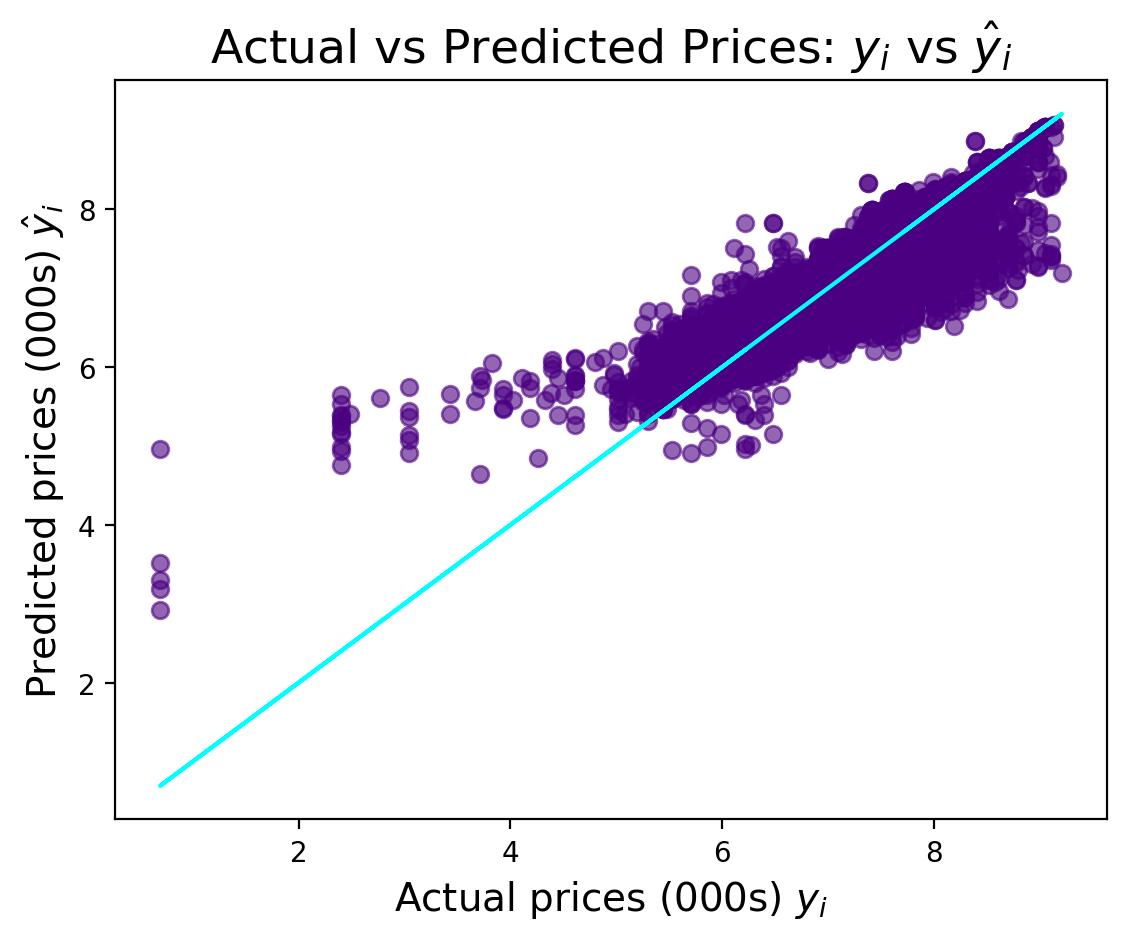

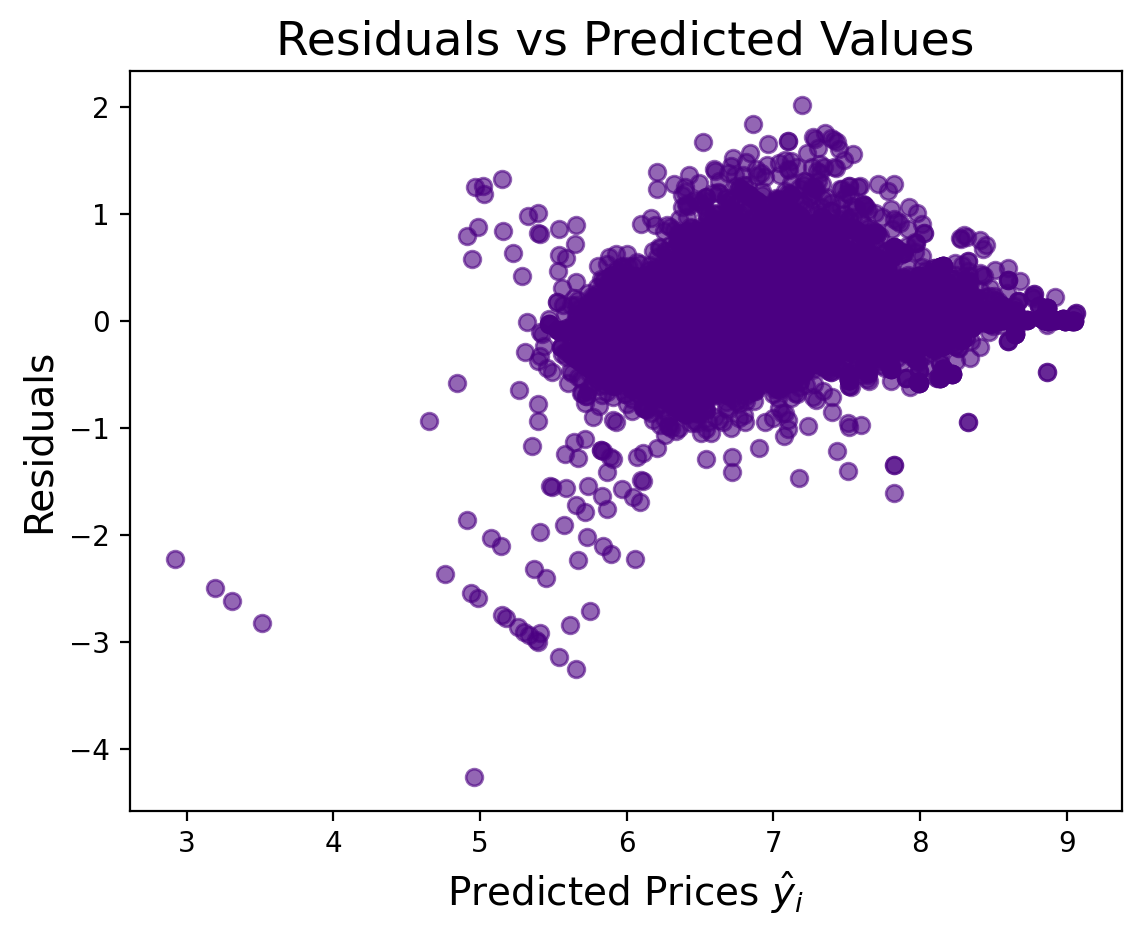

In [2046]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=200)
plt.scatter(x=y_train, y=predicted_vals, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(r'Actual vs Predicted Prices: $y_i$ vs $\hat{y}_i$', fontsize=17)
plt.xlabel(r'Actual prices (000s) $y_i$', fontsize=14)
plt.ylabel(r'Predicted prices (000s) $\hat{y}_i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=200)
plt.scatter(x=predicted_vals, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel(r'Predicted Prices $\hat{y}_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()


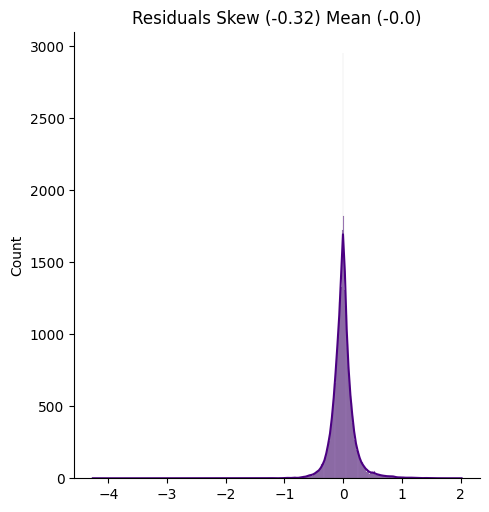

In [2047]:
# Residual Distribution Chart
resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

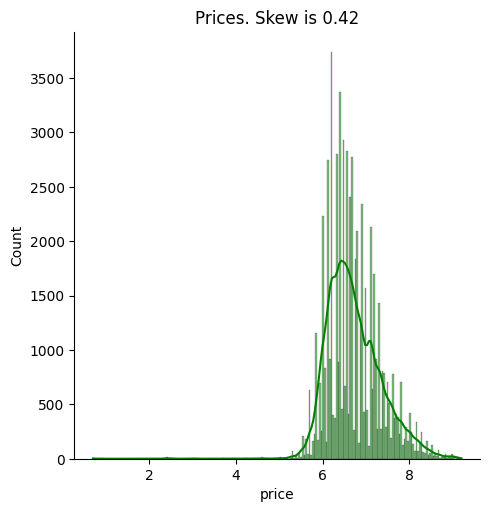

In [2048]:
tgt_skew = encoded_df['price'].skew()
sns.displot(encoded_df['price'], kde='kde', color='green')
plt.title(f'Prices. Skew is {tgt_skew:.3}')
plt.show()

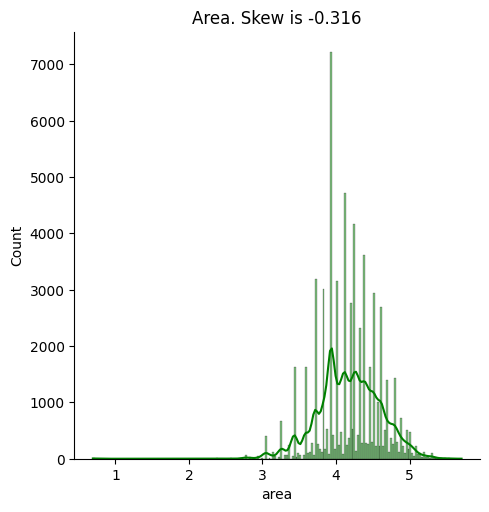

In [2049]:
tgt_skew = encoded_df['area'].skew()
sns.displot(encoded_df['area'], kde='kde', color='green')
plt.title(f'Area. Skew is {tgt_skew:.3}')
plt.show()

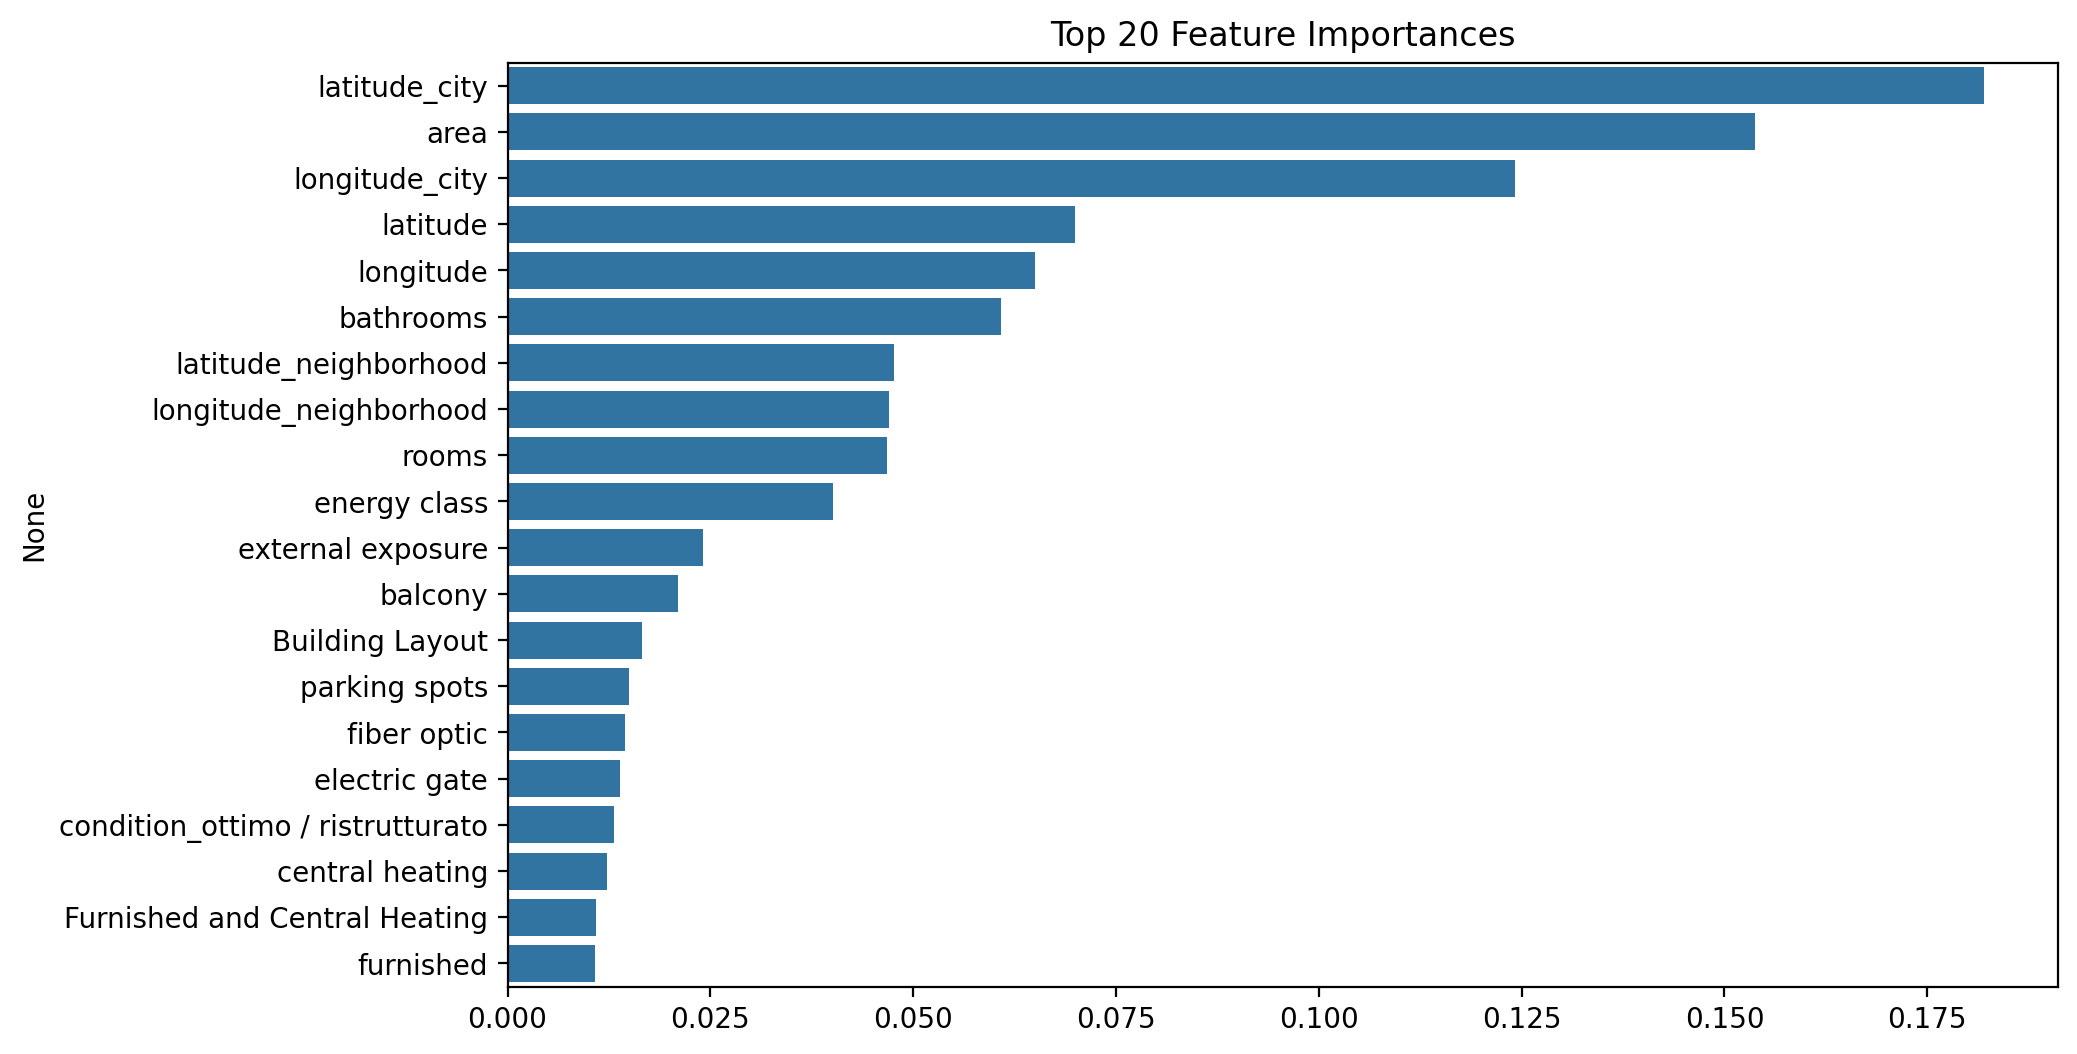

In [2050]:
# Feature Importances
importances = best_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Select top 20 features
top_n = 20
top_indices = indices[:top_n]

plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(x=importances[top_indices], y=X_train.columns[top_indices])
plt.title('Top 20 Feature Importances')
plt.show()


In [2051]:
# Average Values in the Dataset
features = encoded_df.drop(['price'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)), 
                              columns=features.columns)
property_stats

parking spots  bathrooms  rooms  energy class  central heating  area  \
0           0.31       1.18   2.54         -0.27             0.28  4.18   

   furnished  balcony  external exposure  fiber optic  ...  shared garden  \
0       0.78     0.52               0.42         0.49  ...           0.19   

   Building Layout  Furnished and Central Heating  latitude  longitude  \
0             0.47                           0.20     43.95      10.92   

   latitude_city  longitude_city  latitude_neighborhood  \
0          43.88           10.91                  41.31   

   longitude_neighborhood  condition_ottimo / ristrutturato  
0                    8.88                              0.68  

[1 rows x 21 columns]

In [2059]:
log_estimate = best_forest.predict(property_stats)[0]
print(f'The log price estimate is €{log_estimate:.3f}')

euro_est = np.expm1(log_estimate)
print(f'The rent of the property is estimated to be worth €{euro_est:.2f}')

The log price estimate is €6.768
The rent of the property is estimated to be worth €868.23


In [2068]:
# import joblib
# joblib.dump(best_forest, 'rent_prediction_model/rent_model_v2.pkl')

['rent_model_v2.pkl']

In [2064]:
train_data.columns

Index(['parking spots', 'bathrooms', 'rooms', 'energy class',
       'central heating', 'area', 'furnished', 'balcony', 'external exposure',
       'fiber optic', 'electric gate', 'shared garden', 'Building Layout',
       'Furnished and Central Heating', 'latitude', 'longitude',
       'latitude_city', 'longitude_city', 'latitude_neighborhood',
       'longitude_neighborhood', 'condition_ottimo / ristrutturato', 'price'],
      dtype='object')

In [2071]:
train_data.shape

(49954, 22)

In [2067]:
columns = {
    'parking spots': 'int64',
    'bathrooms': 'int64',
    'rooms': 'int64',
    'energy class': 'int64',
    'central heating': 'int64',
    'area': 'float64',
    'furnished': 'int64',
    'balcony': 'int64',
    'external exposure': 'int64',
    'fiber optic': 'int64',
    'electric gate': 'int64',
    'shared garden': 'int64',
    'Building Layout': 'int64',
    'Furnished and Central Heating': 'int64',
    'region_emilia-romagna': 'int64',
    'region_lazio': 'int64',
    'region_lombardia': 'int64',
    'region_piemonte': 'int64',
    'city_Genova': 'int64',
    'city_Milano': 'int64',
    'city_Other': 'int64',
    'city_Roma': 'int64',
    'city_Torino': 'int64',
    'condition_ottimo / ristrutturato': 'int64'
}

# Random values for each column
data = {
    'parking spots': 0,
    'bathrooms': 1,
    'rooms': 2,
    'energy class': 0,
    'central heating': 1,
    'area': np.log1p(60),
    'furnished': 0,
    'balcony': 1,
    'external exposure': 1,
    'fiber optic': 1,
    'electric gate': 1,
    'shared garden': 1,
    'Building Layout': 0,
    'Furnished and Central Heating': 0,
    'latitude': 41.8754852496009,
    'longitude': 12.567550077401787,
    'latitude_city': 41.8754852496009,
    'longitude_city': 12.567550077401787,
    'latitude_neighborhood':41.8754852496009,
    'longitude_neighborhood': 12.567550077401787,
    'condition_ottimo / ristrutturato': 0
}

df = pd.DataFrame([data])

log_estimate = best_forest.predict(df)[0]
print(f'The log price estimate is €{log_estimate:.3f}')

euro_est = np.expm1(log_estimate)
print(f'The rent of the property is estimated to be worth €{euro_est:.2f}')

The log price estimate is €6.675
The rent of the property is estimated to be worth €791.48


In [2060]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = best_forest.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.20775679678830555
Root Mean Squared Error (RMSE): 0.34316031344122616


In [2061]:
from scipy import stats

std_dev = np.std(residuals)

confidence_level = 0.5
z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * std_dev
print(f"Margin of error: {margin_of_error}")

lower_bound_log = y_pred - margin_of_error
upper_bound_log = y_pred + margin_of_error

y_pred_original = np.expm1(y_pred)
lower_bound_original = np.expm1(lower_bound_log)
upper_bound_original = np.expm1(upper_bound_log)

for i in range(5):
    print(f"Predicted value: {y_pred_original[i]:.2f}, Range: [{lower_bound_original[i]:.2f}, {upper_bound_original[i]:.2f}]")

Margin of error: 0.1450747496597613
Predicted value: 1189.29, Range: [1028.55, 1375.12]
Predicted value: 406.27, Range: [351.27, 469.85]
Predicted value: 620.66, Range: [536.71, 717.72]
Predicted value: 785.73, Range: [679.49, 908.56]
Predicted value: 661.66, Range: [572.18, 765.12]
